**<p style='text-align: right;'>Ver. 1.0</p>**

# Introductory Applied Machine Learning (IAML) Coursework 2 - Semester 2, 2020-21

### Author: Hiroshi Shimodaira and Jinhong Lu

## Important Instructions

#### It is important that you follow the instructions below carefully for things to work properly.

You need to set up and activate your environment as you would do for your labs, see Learn section on Labs.  **You will need to use Noteable to create one of the files you will submit (the PDF)**.  Do **NOT** create the PDF in some other way, we will not be able to mark it.  If you want to develop your answers in your own environment, you should make sure you are using the same packages we are using, by running the cell which does imports below.

Read the instructions in this notebook carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the required code/markdown cell.

- We will use the IAML Learn page for any announcements, updates, and FAQs on this assignment. Please visit the page frequently to find the latest information.
- Data files that you will be using are located in the ./datasets directory that is included in the [git repository](https://github.com/uoe-iaml/DL-S2-2021-CW2) for this coursework.
- There is a helper file 'iaml02cw2_helpers.py' in the git repository, which you should upload to your environment.
- Some of the topics in this coursework are covered in weeks 7 and 8 of the course. Focus first on questions on topics that you have covered already, and come back to the other questions as the lectures progress.
- Keep your answers brief and concise.
- Make sure to show all your code/working.
- Write readable code. While we do not expect you to follow PEP8 to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. Do use inline comments when doing something non-standard.
- When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. 
- When you use libraries specified in this coursework, you should use the default parameters unless specified explicitly.
- The criteria on which you will be judged include the quality of the textual answers and/or any plots asked for.

- You will see <html>\\pagebreak</html> at the start of each subquestion.  ***Do not remove these, if you do we will not be able to mark your coursework.***

#### Good Scholarly Practice
Please remember the University requirement regarding all assessed work for credit. Details about this can be found at:
http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct
Specifically, this assignment should be your own individual work. We will employ tools for detecting misconduct.

Moreover, please note that Piazza is NOT a forum for discussing the solutions of the assignment. You may, in exceptional circumstances, ask private questions.

### SUBMISSION Mechanics
This assignment will account for 30% of your final mark. We ask you to submit answers to all questions.

You will submit (1) a PDF of your Notebook via Gradescope, and (2) the Notebook itself via Learn.  Your grade will be based on the PDF, we will only use the Notebook if we need to see details.  **You must use the following procedure to create the materials to submit**.

1. Make sure your Notebook and the datasets are in Noteable and will run.  If you developed your answers in Noteable, this is already done.

2. Select **Kernel->Restart & Run All** to create a clean copy of your submission, this will run the cells in order from top to bottom.  This may take a while (a few hours) to complete, ensure that all the output and plots have complete before you proceed.

3. Select **File->Download as->PDF via LaTeX (.pdf)** and wait for the PDF to be created and downloaded.

4. Select **File->Download as->Notebook (.ipynb)**

5. You now should have in your download folder the pdf and the notebook.  Rename them sNNNNNNN.pdf and sNNNNNNN.ipynb, where sNNNNNNN is your matriculation number (student number).

**Details on submission instructions will be announced and documented on Learn well before the deadline**. 

The submission deadline for this assignment is **23rd March 2021 at 16:00 UK time (UTC)**.  Don't leave it to the last minute!

### Tips on experiments
- Some experiments may take a long time to complete (e.g. more than 10 minutes or could be even more than an hour for Question 3.2 depending on conditions). It will be a good idea that you test your code with a small number of samples for debugging. You should use the whole data when you write your report.

#### IMPORTS
Execute the cell below to import all packages you will be using for this assignment.  If you are not using Noteable, make sure the python and package version numbers reported match the python and package numbers specified in the comment at the end of this cell.

In [2]:
import os
import platform
import sys
import sklearn
import scipy
import numpy as np
np.random.seed(260393)
import pandas as pd
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, leaves_list
from sklearn.svm import SVC
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
import string
from sklearn.model_selection import LeaveOneOut
import warnings 
warnings.filterwarnings('ignore')
from statistics import mean 
print("All packages imported!")
print("python=={}".format(platform.python_version()))
# print("seaborn=={}".format(sns.__version__))
print("scikit-learn=={}".format(sklearn.__version__))
# print("pandas=={}".format(pd.__version__))
print("numpy=={}".format(np.__version__))
print("scypy=={}".format(scipy.__version__))
print("matplotlib=={}".format(mp.__version__))

# You should see this output:
# python==3.7.6
# seaborn==0.11.0
# scikit-learn==0.23.2
# pandas==1.1.4
# numpy==1.19.4
# scypy==1.5.3
# matplotlib==3.2.2

All packages imported!
python==3.7.6
scikit-learn==0.23.2
numpy==1.19.4
scypy==1.5.3
matplotlib==3.2.2


\pagebreak

# Question 1 Data analysis

#### 69 marks out of 163 for this coursework

### EMNIST Handwritten Character Dataset

This question employs the [EMNIST handwritten character data set](https://www.nist.gov/itl/iad/image-group/emnist-dataset). Each character image is represented as 28-by-28 pixels in gray scale (ranging from 0 to 255), stored as a row vector of 784 elements (28 × 28 = 784) in column-major order. A subset of the original EMNIST data set is considered in the coursework, restricting characters to English alphabet of 26 letters in lower case. Label numbers are given in alphabetical order, where label 0 corresponds to 'a' and 25 to 'z'. There are 1800 training samples and 300 test samples for each class. Note that you will find some errors (wrong labels and wrong letters) in the data set, but we use the data set as it is.

***Loading data:***
Upload the data set file "data1.mat" to your environment, make sure that you have "iaml02cw2_helpers.py" in your environment, and run the following cell.

In [2]:
# Load the data set and apply some changes
from iaml02cw2_helpers import *
Xtrn_org, Ytrn_org, Xtst_org, Ytst_org = load_EMNIST_subset()
Xtrn = Xtrn_org / 255.0   # Training data : (46800, 784)
Xtst = Xtst_org / 255.0   # Testing data : (7800, 784)
Ytrn = Ytrn_org - 1       # Labels for Xtrn : (46800,)
Ytst = Ytst_org - 1       # Labels for Xtst : (7800,)
Xmean = np.mean(Xtrn, axis=0)
Xtrn_nm = Xtrn - Xmean; Xtst_nm = Xtst - Xmean  # Mean-normalised versions of data


Xtrn and Ytrn are training data and corresponding labels, whereas Xtst and Ytst are test data and labels. Xtrn_nm and Xtst_nm are mean-normalised versions of Xtrn and Xtst, respectively.

\pagebreak

# ========== Question 1.1 --- [4 marks] ==========

Show the minimum, maximum, mean, and variance of the pixel values for the first sample in Xtrn.

In [3]:
# Your code goes here
print ("The mean of the first sample is {}".format(Xtrn[0].mean()))
print ("The min of the first sample is {}".format(Xtrn[0].min()))
print ("The max of the first sample is {}".format(Xtrn[0].max()))
print ("The variance of the first sample is {}".format(Xtrn[0].var()))

The mean of the first sample is 0.16064925970388155
The min of the first sample is 0.0
The max of the first sample is 1.0
The variance of the first sample is 0.09683069443763903


\pagebreak

# ========== Question 1.2 --- [6 marks] ==========


Display the images of the first and last sample in the training data Xtrn in the following two ways.

1. [Code] Display the images using Matplolib's imshow(). You should display images in a gray scale, 
2. [Code] Display the images using print() function, where you display a character '\*' when the value of pixel is greater than 0 (zero), and display ' ' (space) otherwise, so that an image is displayed using 28 lines, each of which has the length of 28 characters.

Note that an image of 28-by-28 pixels is stored in a vector of 784 elements in ***colum-major order*** instead of row-major order. You need be careful about the order when you recover the original 28-by-28 array from a vector so that the image is displayed properly.

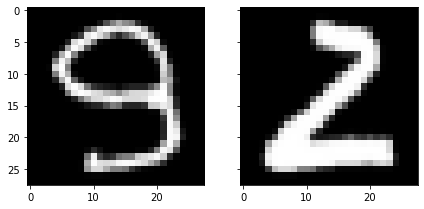

In [4]:
#(1) Your code goes here
fig, (axs1,axs2) = plt.subplots(1, 2, figsize=(7, 7),sharex=True, sharey=True)
axs1.imshow(Xtrn[0].reshape(28,28).T,cmap='gray')
axs2.imshow(Xtrn[-1].reshape(28,28).T,cmap='gray')

In [18]:
#(2) Your code goes here
x=[0,-1]
for i in x:
    output = (np.where(Xtrn[i].reshape(28,28).T > 0, "*", " "))
    for pixel in output:
        print(' '.join(pixel.astype(str)))
      

print("The number of lines for which the image is displayed is {}".format(len(pixel)))    

                                                       
                            *                          
                      * * * * * * * *                  
                * * * * * * * * * * * * *              
              * * * * * * * * * * * * * *              
            * * * * * * *         * * * * *            
          * * * * * *               * * * *            
        * * * * *                     * * * *          
        * * * *                       * * * *          
      * * * *                           * * * *        
        * * * *                         * * * *        
        * * * * *                       * * * *        
          * * * * * * * * * * * * * * * * * * *        
          * * * * * * * * * * * * * * * * * * *        
            * * * * * * * * * * * * * * * * * *        
                * * * * * * * * * * * * * * * *        
                                      * * * * *        
                                          * * * 

\pagebreak

# ========== Question 1.3 --- [10 marks] ==========

Using Xtrn and the Euclidean distance measure, for the first four classes, i.e., 'a','b','c', and 'd', find the two closest samples and four furthest samples of that class to the mean of the class.
1. [Code] Display the images of the mean vectors and samples you found in a 4-by-7 grid, where the top row corresponds to the images for class 'a', and the bottom to those for class 'd'. The seven columns are the image of the mean vector and the images of the first and second closest and fourth, third, second, and first furthest samples to the mean vector for that class, respectively (from left to right). For each image sample, you should provide the class number and the sample number in the data set. Note that we use 0-based indexing.
2. [Text] Discuss possible issues when we use this data set for classification tasks.

In [19]:
def find(lst, a):
    return [i for i, x in enumerate(lst) if x==a]
index_a=find(Ytrn,0)
index_b=find(Ytrn,1)
index_c=find(Ytrn,2)
index_d=find(Ytrn,3)
a=Xtrn[index_a]
a_mean=a.mean(axis=0)
b=Xtrn[index_b]
b_mean=b.mean(axis=0)
c=Xtrn[index_c]
c_mean=c.mean(axis=0)
d=Xtrn[index_d]
d_mean=d.mean(axis=0)

#Finding the closest and furthest sample numbers
letters=[a,b,c,d]
letter_names=["a","b","c","d"]
indexes=[index_a,index_b,index_c,index_d]
means=[a_mean,b_mean,c_mean,d_mean]

for letter, index,mean,name in zip(letters,indexes,means,letter_names):
    dis=[]
    ind=[]
    for i in range(len(index)):
        distances = np.linalg.norm(Xtrn[index[i],:]-mean)        
        dis.append(distances)#        
        ind.append(index[i])
    zipped = sorted(set(zip(dis,ind)),key = lambda x: x[0])
    print("For letter " +name+ "  closest two are (distance, index)",zipped[0:2])
    print("For letter " +name+ " farthest four are (distance, index) ",zipped[-4:])

For letter a  closest two are (distance, index) [(5.373635982747826, 30632), (5.474378064559376, 7619)]
For letter a farthest four are (distance, index)  [(10.736286346979028, 39813), (10.87582167245925, 38601), (11.00155499995428, 9467), (11.382070992456546, 27608)]
For letter b  closest two are (distance, index) [(4.916683126595965, 34809), (4.92947124213323, 42185)]
For letter b farthest four are (distance, index)  [(11.232305775789293, 18783), (11.39396019646545, 3842), (11.485075178872744, 25021), (11.69288602472463, 1471)]
For letter c  closest two are (distance, index) [(4.638981621749589, 41313), (4.63918047944804, 34990)]
For letter c farthest four are (distance, index)  [(10.399656107735037, 44630), (10.512131383808333, 15515), (10.587645707680348, 14413), (11.159465502999627, 2665)]
For letter d  closest two are (distance, index) [(4.823934963546896, 46014), (4.856928941448346, 45056)]
For letter d farthest four are (distance, index)  [(10.991442830205846, 32892), (11.373405

Text(0.5, 1.0, 'Class:3\n Sample:10770')

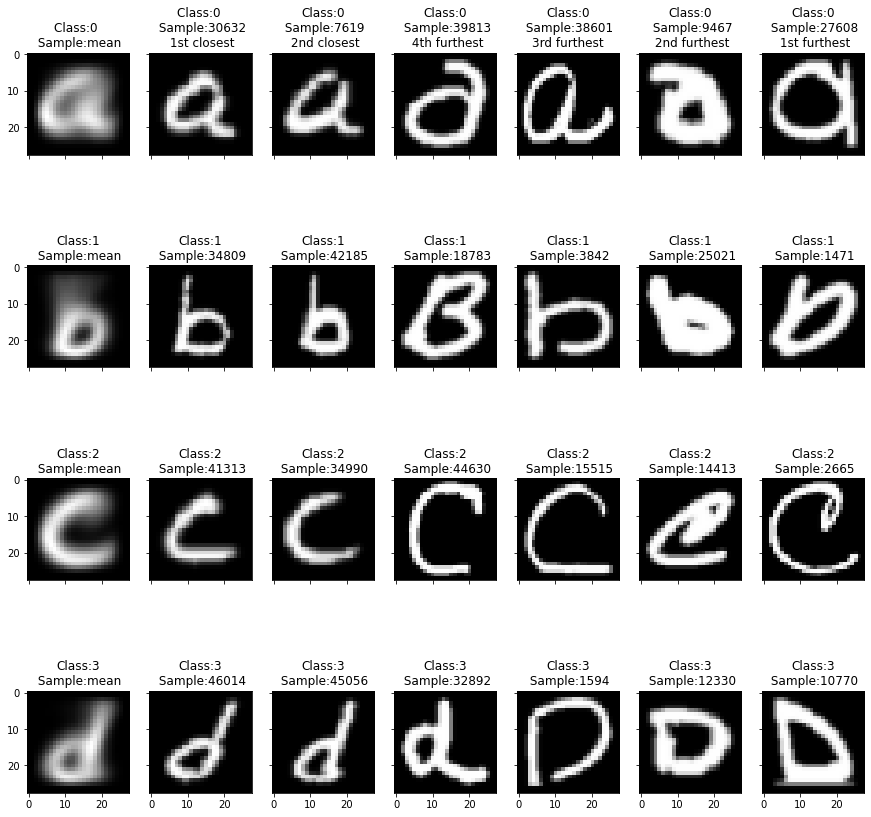

In [20]:
#(1) Your code goes here


fig, axs = plt.subplots(4, 7, figsize=(15, 15),sharex=True, sharey=True)

#CLASS "a"
axs[0,0].imshow(a_mean.reshape(28,28).T,cmap="gray")
axs[0,0].set_title("Class:0 \n Sample:mean")
axs[0,1].imshow(Xtrn[30632].reshape(28,28).T,cmap="gray") #d=5.373635982747826, ind=30632
axs[0,1].set_title("Class:0 \n Sample:30632\n 1st closest")
axs[0,2].imshow(Xtrn[7619].reshape(28,28).T,cmap="gray") #d=5.474378064559376, ind=7619
axs[0,2].set_title("Class:0\n Sample:7619\n 2nd closest")
axs[0,3].imshow(Xtrn[39813].reshape(28,28).T,cmap="gray") #d=10.736286346979028, ind=39813
axs[0,3].set_title("Class:0\n Sample:39813\n 4th furthest")
axs[0,4].imshow(Xtrn[38601].reshape(28,28).T,cmap="gray") #d=10.87582167245925, ind=38601
axs[0,4].set_title("Class:0\n Sample:38601\n3rd furthest")
axs[0,5].imshow(Xtrn[9467].reshape(28,28).T,cmap="gray") #d=11.00155499995428,ind=9467
axs[0,5].set_title("Class:0\n Sample:9467\n 2nd furthest")
axs[0,6].imshow(Xtrn[27608].reshape(28,28).T,cmap="gray") #d=11.382070992456546, ind=27608
axs[0,6].set_title("Class:0\n Sample:27608\n 1st furthest")




#CLASS "b"
axs[1,0].imshow(b_mean.reshape(28,28).T,cmap="gray")
axs[1,0].set_title("Class:1\n Sample:mean")
axs[1,1].imshow(Xtrn[34809].reshape(28,28).T,cmap="gray") #d=4.916683126595965, ind=34809
axs[1,1].set_title("Class:1\n Sample:34809")
axs[1,2].imshow(Xtrn[42185].reshape(28,28).T,cmap="gray") #d=4.92947124213323, ind=42185
axs[1,2].set_title("Class:1\n Sample:42185")
axs[1,3].imshow(Xtrn[18783].reshape(28,28).T,cmap="gray") #d=11.232305775789293, ind=18783
axs[1,3].set_title("Class:1\n Sample:18783")
axs[1,4].imshow(Xtrn[3842].reshape(28,28).T,cmap="gray") #d=11.39396019646545,ind=3842
axs[1,4].set_title("Class:1\n Sample:3842")
axs[1,5].imshow(Xtrn[25021].reshape(28,28).T,cmap="gray") #d=11.485075178872744, ind=25021
axs[1,5].set_title("Class:1\n Sample:25021")
axs[1,6].imshow(Xtrn[1471].reshape(28,28).T,cmap="gray") #d=11.69288602472463, ind=1471
axs[1,6].set_title("Class:1\n Sample:1471")



#CLASS "c"

axs[2,0].imshow(c_mean.reshape(28,28).T,cmap="gray")
axs[2,0].set_title("Class:2\n Sample:mean")
axs[2,1].imshow(Xtrn[41313].reshape(28,28).T,cmap="gray") #d=4.638981621749589, ind=41313
axs[2,1].set_title("Class:2\n Sample:41313")
axs[2,2].imshow(Xtrn[34990].reshape(28,28).T,cmap="gray") #d=4.63918047944804, ind=34990
axs[2,2].set_title("Class:2\n Sample:34990")
axs[2,3].imshow(Xtrn[44630].reshape(28,28).T,cmap="gray") #d=10.399656107735037,ind=44630
axs[2,3].set_title("Class:2\n Sample:44630")
axs[2,4].imshow(Xtrn[15515].reshape(28,28).T,cmap="gray") #d=10.512131383808333, ind=15515
axs[2,4].set_title("Class:2\n Sample:15515")
axs[2,5].imshow(Xtrn[14413].reshape(28,28).T,cmap="gray") #d=10.587645707680348, ind=14413
axs[2,5].set_title("Class:2\n Sample:14413")
axs[2,6].imshow(Xtrn[2665].reshape(28,28).T,cmap="gray") #d=11.159465502999627, ind=2665
axs[2,6].set_title("Class:2\n Sample:2665")


#Clas "d"

axs[3,0].imshow(d_mean.reshape(28,28).T,cmap="gray")
axs[3,0].set_title("Class:3\n Sample:mean")
axs[3,1].imshow(Xtrn[46014].reshape(28,28).T,cmap="gray") # d= 4.823934963546896, ind=46014
axs[3,1].set_title("Class:3\n Sample:46014")
axs[3,2].imshow(Xtrn[45056].reshape(28,28).T,cmap="gray") # d= 4.856928941448346,ind= 45056
axs[3,2].set_title("Class:3\n Sample:45056")
axs[3,3].imshow(Xtrn[32892].reshape(28,28).T,cmap="gray") # d= 10.991442830205846, ind=32892
axs[3,3].set_title("Class:3\n Sample:32892")
axs[3,4].imshow(Xtrn[1594].reshape(28,28).T,cmap="gray") # d=11.373405520293955, ind=1594
axs[3,4].set_title("Class:3\n Sample:1594")
axs[3,5].imshow(Xtrn[12330].reshape(28,28).T,cmap="gray") # d=11.377382433174807, ind=12330
axs[3,5].set_title("Class:3\n Sample:12330")
axs[3,6].imshow(Xtrn[10770].reshape(28,28).T,cmap="gray") # d=11.853462894713589, ind=10770
axs[3,6].set_title("Class:3\n Sample:10770")


(2) ***Your answer goes here***

1) This dataset is a subset of EMNIST which is an extended version of MNIST. Though this dataset is balanced in terms of classes and restricted to handwritten lower-case letters, when we look at the dataset holistically, we can see that many samples are uppercase as well. Different people have different handwriting styles that increases the complexity for the classifier. Additionally, the classification task can become challenging due to misclassification between lowercase and upper-case letters of the same letter i.e. Some letters have completely different representation of uppercase and lower case. Therefore, the classifier needs to link those two letters together as a single letter. Some letters are written straight but some are slanting. Letters such as lowercase “L” and uppercase “I” are commonly confused. The classifier needs to label them in different category which is tricky. Finally, false label is also going to degrade the classification accuracy. From the confusion matrix created in Fig6 of the original paper of EMNIST by Gregory Cohen, we can see that “L” is confused with “I” 174 times and “G” is confused with “Q” 131 times and vice versa.

\pagebreak

# ========== Question 1.4 --- [12 marks] ==========

Applying the Principal Component Analysis (PCA) to Xtrn_nm using sklearn.decomptision.PCA, answer the following questions:

1. [Code] Report the variances of the projected data for the first five principal components.
2. [Code] Plot a graph of the cumulative explained variance ratio as a function of the number of principal components, k, where 1 $\le$ K $\le$ 784.
3. [Code] Find the minimum number of principal components required to explain 50%, 60%, 70%, 80%, and 90% of the total variance, respectively.
4. [Code] Display the images of the first 10 principal components in a 2-by-5 grid, putting the image of first principal component on the top left corner, followed by the one of second component to the right. 
5. [Text] Based on the images you obtained above, discuss your findings briefly.


In [8]:
#(1) Your code goes here
pca=PCA(n_components=5)
pca.fit(Xtrn_nm)
formatted_list = ["%.4f"%item for item in pca.explained_variance_]
print("First five principal components variances:",formatted_list)


First five principal components variances: ['6.5055', '4.3242', '3.5108', '3.1107', '2.9333']


Text(0.5, 1.0, 'Plot between number of components and Cumulative explained variance % ')

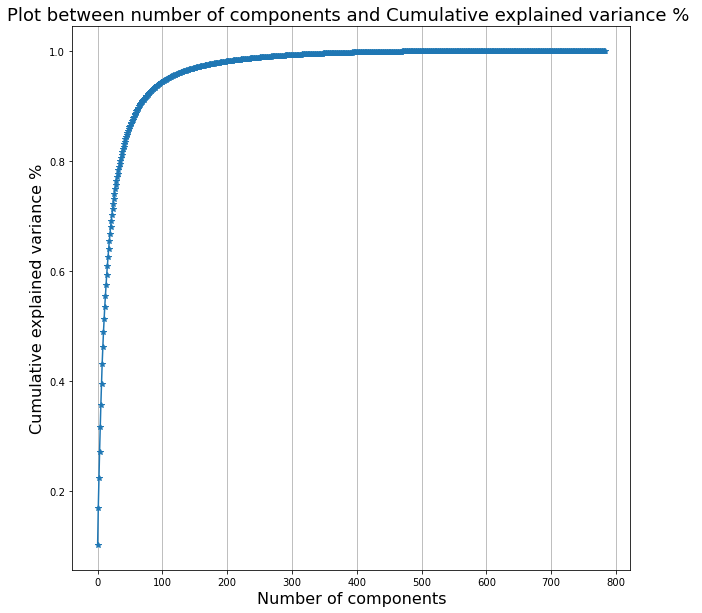

In [12]:
#(2) Your code goes here
plt.figure(figsize=(10,10))
pca=PCA(n_components=784)
pca.fit(Xtrn_nm)
f = range(pca.n_components)
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker="*")
plt.grid(axis="x")
plt.xlabel('Number of components',fontsize=16)
plt.ylabel('Cumulative explained variance %',fontsize=16)
plt.title("Plot between number of components and Cumulative explained variance % ",fontsize=18)

In [13]:
#(3) Your code goes here
x = range(pca.n_components)
y=np.cumsum(pca.explained_variance_ratio_)
r=[.5,.6,.7,.8,.9]
for i in r:
    print("Minimum components required for {} % data are {}".format(i*100,round(np.interp(i, y,x))))


Minimum components required for 50.0 % data are 10
Minimum components required for 60.0 % data are 14
Minimum components required for 70.0 % data are 22
Minimum components required for 80.0 % data are 35
Minimum components required for 90.0 % data are 65


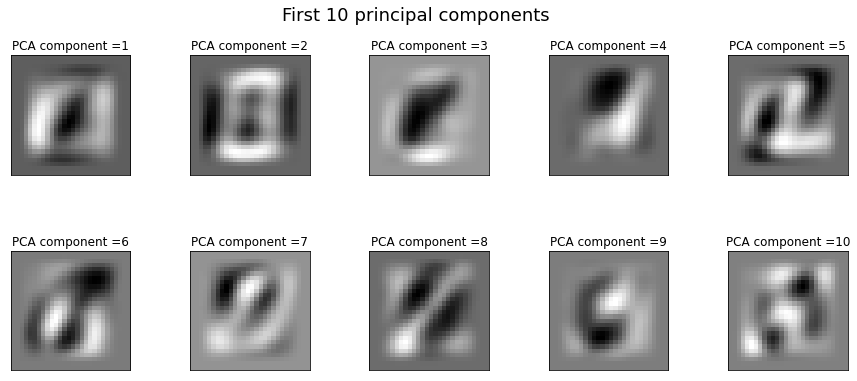

In [17]:
#(2) Your code goes here
def plot_digits(data):
    fig, axes = plt.subplots(2, 5, figsize=(15, 6),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.5, wspace=0.5))
    pca=PCA(n_components=10)
    pca.fit(data)
    for i, ax in enumerate(axes.flat):
        ax.imshow((pca.components_[i].reshape(28, 28)).T,cmap='gray')
        ax.set_title("PCA component ={}".format(i+1))
        plt.suptitle("First 10 principal components",fontsize=18)
plot_digits(Xtrn_nm)

(5) ***Your answer goes here***
1) Part 1 shows the five PCA variances which is the summative variance or multivariate variability. It shows the importance of each Principal components.

2) The graph returns a cumulative sum of the PCA explained variances on y-axis with the number of components on the x-axis. This graph can give us a good estimation of the number of components required for an amount of data. 

3) Ouput shows the number of components required for the %amount of data.

4) PCA components are new variables constructed as a combination of the initial variables. It is used for dimensionality reduction especially in images where most of the information is stored in the initial components. All the aspects of the components cannot be fully understood but apparently the first ten components in the images show which features of the image is represented by those components such as orientation, lightening etc. These are the eigen vectors that are extracted when “fit_transform” is applied to the data. They determine the direction of the new feature space and eigen values represent the values. If we apply the code in part 4 to a single class i.e., “a” then we can understand better how each component contribute to the features of the image. Nonetheless, the first image shows the most information encoded on the first component or the horizontal aspects of the foreground of the image. The second component shows the vertical aspects of the image. The third component apparently displays the background aspect etc. These 10 components can describe 50% of the data

\pagebreak

# ========== Question 1.5 --- [15 marks] ==========

We now consider applying dimensionality reduction with PCA to a sample and reconstructing the sample from the dimensionality-reduced sample.
Answer the following questions:

1. [Text] Describe this process using mathematical formulae.
2. [Code] For each class of 'a', 'b', 'c', and 'd', and for each number of principal components K=5,10,20,40,80,160,320, find the first sample in Xtrn_nm, apply the dimensionality reduction, reconstruct that sample, and display the image of that reconstructed sample in a 4-by-7 grid, where each row corresponds to a class and each column corresponds to a value of K. For each reconstructed sample, you should provide the root mean square error. Note that you should add Xmean to each reconstructed sample to display the corresponding image.
3. [Text] Explain your findings

(1) ***Your answer goes here***<br>
Principal Component analysis to form an $M$-Dimentional approximation of a dataset {$x^{n}$,$n=1$,...,$N$}, with dim $x^{n}=D$ <br>

1) Find the $D \times 1$ sample mean vector $\textbf{m}$ and $D \times D$ covariance matrix $\textbf{S}$ <br>

$\textbf{m}=\frac{1}{N}\sum_{n=1}^{N} x^{n}$, $\textbf{S}=\frac{1}{N-1}\sum_{n=1}^{N} (x^{n}-\textbf{m})(x^{n}-\textbf{m})^{T}$ <br>

2) Find the eigenvectors $e^{1},e^{2},...,e^{M}$ of the covariance matrix $S$, sorted so that the eigen value of $e^{i}$ is greater then $e^{j}$ where $i<j$. Form the matrix $\textbf{E}=[e^{1},...,e^{M}]$.<br>

3) The lower dimentional representation of data point $x^{n}$ is given by : <br>

$y^{n}=\textbf{E}^{T}(x^{n}-\textbf{m})$ <br>

4) The approximate resonstruction of the original data point $x^{n}$ is :<br>

$x^{n}\approx \textbf{m} + \textbf{E}y^{n}$<br>

5) The total squared error over all the training data made by the approximation is : <br>

$\sum_{n=1}^{N} (x^{n}-\tilde{x^{n}})^{2}= (N-1)\sum_{j=M+1}^{D} \lambda_{j}$ <br>

where $\lambda_{M+1}...\lambda_{N}$ are the eigen values discarded in the pictures.

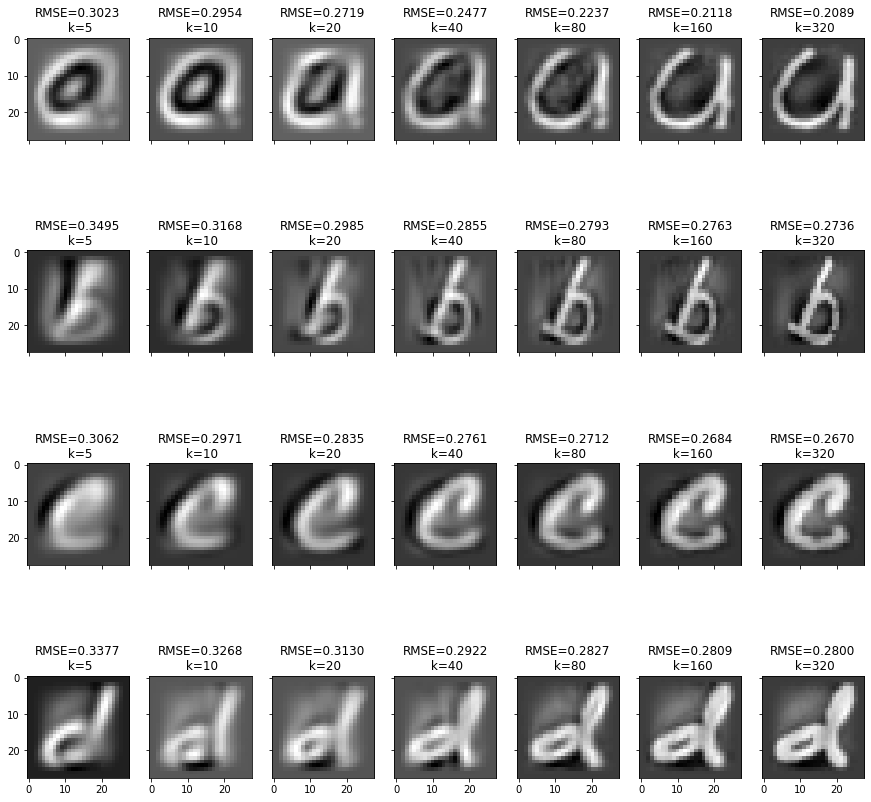

In [22]:
Xtrn_nm_a=Xtrn_nm[index_a]
a_mean=Xtrn_nm_a.mean(axis=0)

Xtrn_nm_b=Xtrn_nm[index_b]
b_mean=Xtrn_nm_b.mean(axis=0)

Xtrn_nm_c=Xtrn_nm[index_c]
c_mean=Xtrn_nm_c.mean(axis=0)

Xtrn_nm_d=Xtrn_nm[index_d]
d_mean=Xtrn_nm_d.mean(axis=0)

K= [5,10,20,40,80,160,320]

#Applying PCA and reconstruction

fig, axs = plt.subplots(4, 7, figsize=(15, 15),sharex=True, sharey=True)
axs=axs.ravel()
position=0
class_=[Xtrn_nm_a,Xtrn_nm_b,Xtrn_nm_c,Xtrn_nm_d]
for cl in class_:
    for k,i  in zip(K, range(len(K))):
        pca=PCA(n_components=k)
        proj=pca.fit_transform(cl)
        projected_first=proj[0]
        recon=Xmean
        for comp in range(k):
            recon=recon+pca.components_[comp]*projected_first[comp]
            predict=recon
            letter=(recon).reshape(28,28).T        
        
        rmse=mean_squared_error(cl[0], predict,squared=False)
        axs[position].imshow(letter,cmap='gray')
        axs[position].set_title('RMSE={:0.4f}\n k={}'.format(rmse,k))      
        position=position+1

(3) ***Your answer goes here***

1) The figures (left to right of each class) show the more reconstructed components are added to the mean of the class images. more the sample is reconstructed back to its original form (First sample of first four classes). When we add only 5 reconstructed components then the image is the blurriest and visually far from the original image but resemble more like a the mean of the alphabet. Moreover, less components would give more RMSE value as the there is more difference between the mean and the reconstructed Eigen vectors of the image. If the components are increased i.e., k=320 then not only the RMSE would decrease, but the image would also become more closer to the original image of the sample.
One thing to note is that the reconstructed image does not completely transform in to ots original form even after 320 components added because PCA is a process of dimentionality reduction where a lot of information is lost.However, with 80 components we can explain more then 90% of the data

\pagebreak

# ========== Question 1.6 --- [6 marks] ==========

Applying k-means clustering to Xtrn with various values of k, answer (in brief) the following questions:

1. [Code] Show a graph of the sum of square error (SSE) as a function of k.
2. [Text] Discuss your findings. 

[33134400.00000008, 31356104.42876578, 30512672.42138326, 29918172.24666215, 29395340.133119375, 28944164.51676182, 28595927.14465854, 28276170.211543266, 27991150.684937373, 27737196.564148765, 27488070.876713175, 27266610.977965157, 27058040.232772678, 26854287.23385648, 26680953.679223232, 26491057.91854862, 26327392.05834764, 26167039.84516651, 26026280.756532695]


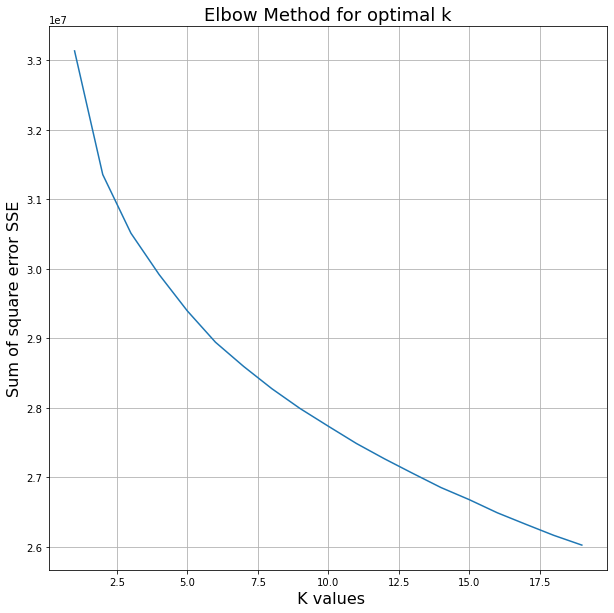

In [3]:
#(1) Your code goes here
scale=StandardScaler()
X_scale=scale.fit_transform(Xtrn)
k_values=range(1,20)
sse=[]
for ii in (k_values):
    km=KMeans(n_clusters=ii)
    km.fit(X_scale)
    scores=km.inertia_
    sse.append(scores)
print(sse)
%matplotlib inline
plt.figure(figsize=(10,10))
plt.plot(k_values,sse)
plt.xlabel(" K values",fontsize=16)
plt.ylabel("Sum of square error SSE",fontsize=16)
plt.title("Elbow Method for optimal k",fontsize=18)
plt.grid()

(2) ***Your answer goes here***

The plot between number of clusters and sum of square errors in KMeans clustering called the elbow method for finding the optimal value of clusters. In the figure we can see that as k increases, the sum of squared distance tends to move to zero. Imagine we set k to its maximum value n (where n is number of samples) each sample will form its own cluster meaning sum of squared distances equals zero. In the plot we specify the range of k. The plot will look like an arm and the elbow of the arm would identify the optimal value of k. From the figure we can see that there is no apparent elbow , however we can assume k=6 is the optimal value of clusters in the dataset as it lies on the assumed elbow.After k=6 the values of SSE begin to saturate towards zero.

\pagebreak

# ========== Question 1.7 --- [16 marks] ==========

Apply hierarchical clustering with the Ward's linkage to all the samples of letter 'b' in Xtrn. Answer the following questions.

 1. [Code] Plot a dendrogram with scipy.cluster.hierarchy.dendrogram(), in which you specify orientation='right'.
 2. [Code] For each of the last four clusters to the root node, i.e, the four nodes from the root node on the dendrogram, find the number of samples (i.e. the number of leaf nodes) that belong to the cluster.
 3. [Code] For each of the last four clusters described above, display the image of the cluster centre and the image of the sample that is closest to the cluster centre. For each image sample, you should provide the sample number in the data set. Note that cluster centre is the mean vector of samples in that cluster. 
 4. [Text] Discuss your findings.

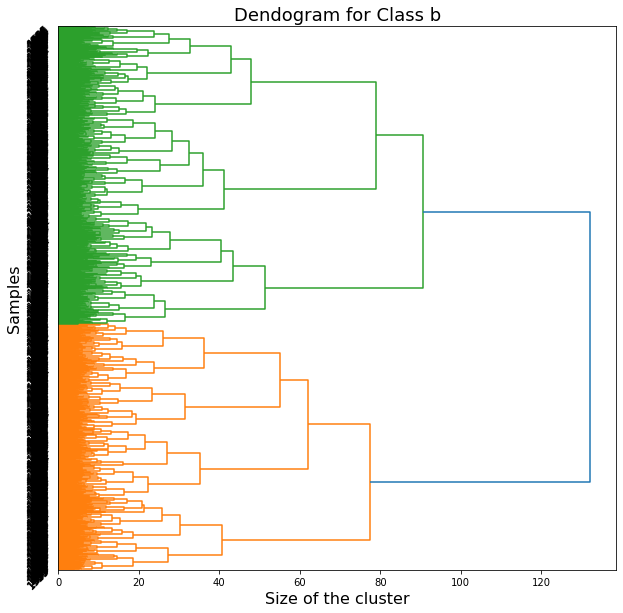

In [23]:
#(1) Your code goes here
plt.figure(figsize=(10,10))
Xtrn_b=Xtrn_nm[index_b]
Z=linkage(Xtrn_b,"ward")
dendrogram(Z,orientation="right",p=12,leaf_rotation=45.,leaf_font_size=10,show_contracted=True,show_leaf_counts=False)
plt.title("Dendogram for Class b",fontsize=18)
plt.xlabel("Size of the cluster",fontsize=16)
plt.ylabel("Samples",fontsize=16)
plt.show()

The No of Samples in Cluster 1 is 815, Cluster 2 is 352, Cluster 3 is 335 and Cluster 4 is 298


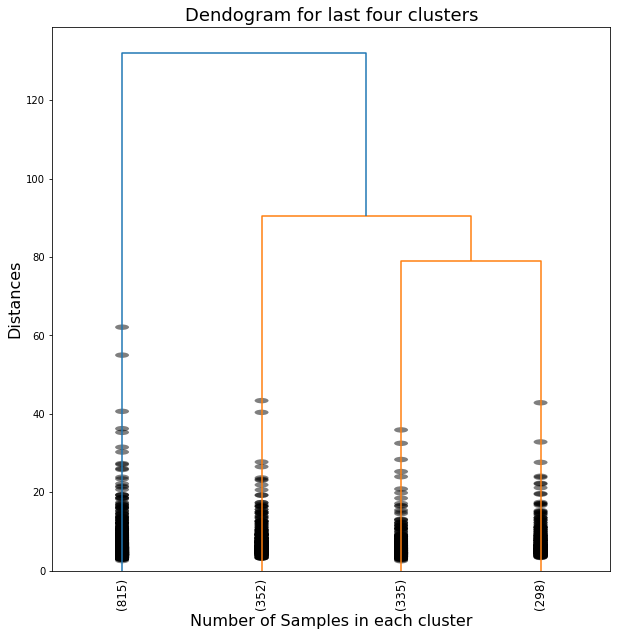

In [24]:
#(2) Your code goes here
cluster1=[]
cluster2=[]
cluster3=[]
cluster4=[]
f = fcluster(Z,4,criterion='maxclust')
dict_b = dict(zip(index_b, f))
for key, value in dict_b.items():
    if value == 1:
        cluster1.append(key)
    elif value==2:
        cluster2.append(key)
    elif value==3:
        cluster3.append(key)
    elif value==4:
        cluster4.append(key)       

print("The No of Samples in Cluster 1 is {}, Cluster 2 is {}, Cluster 3 is {} and Cluster 4 is {}".format(len(cluster1),len(cluster2),len(cluster3),len(cluster4)))
plt.figure(figsize=(10,10))
dendrogram(Z,truncate_mode='lastp',p=4,show_leaf_counts=True,leaf_rotation=90.,leaf_font_size=12.,show_contracted=True,)
plt.xlabel("Number of Samples in each cluster",fontsize=16)
plt.ylabel("Distances",fontsize=16)
plt.title("Dendogram for last four clusters",fontsize=18)
plt.show()

For Cluster1 closest sample is (distance, index) [(4.388147170451576, 16271)]
For Cluster2 closest sample is (distance, index) [(4.393841206570093, 38327)]
For Cluster3 closest sample is (distance, index) [(3.7996048743867603, 37228)]
For Cluster4 closest sample is (distance, index) [(4.2453045287740645, 44027)]


Text(0.5, 1.0, 'Closest to mean\n Cluster4\nSample#44027')

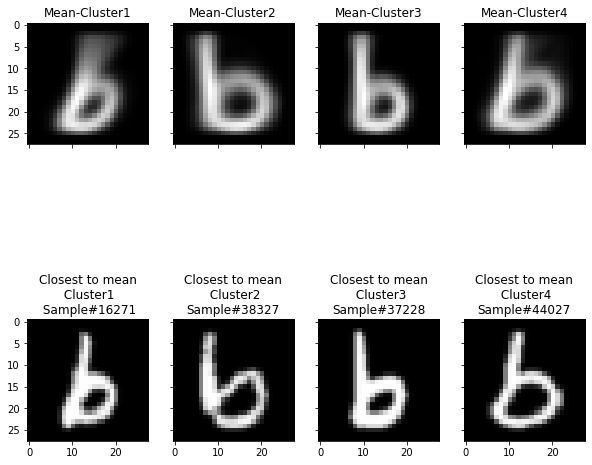

In [23]:
#(3) Your code goes here
names=["Cluster1","Cluster2","Cluster3","Cluster4"]
X_clus1=Xtrn[cluster1]
X_clus2=Xtrn[cluster2]
X_clus3=Xtrn[cluster3]
X_clus4=Xtrn[cluster4]
X_clus1_mean=X_clus1.mean(axis=0)
X_clus2_mean=X_clus2.mean(axis=0)
X_clus3_mean=X_clus3.mean(axis=0)
X_clus4_mean=X_clus4.mean(axis=0)



cl_mean=[X_clus1_mean,X_clus2_mean,X_clus3_mean,X_clus4_mean]
cl=[X_clus1,X_clus2,X_clus3,X_clus4]
for  x,mean,name in zip(cl,cl_mean,names):
    dis=[]
    ind=[]
    for i in range(len(index_b)):
        distances = np.linalg.norm(Xtrn[index_b[i],:]-mean)        
        dis.append(distances)#        
        ind.append(index_b[i])
    zipped = sorted(set(zip(dis,ind)),key = lambda x: x[0])
    print("For "+name+ " closest sample is (distance, index)",zipped[0:1])
    



fig, axs = plt.subplots(2, 4, figsize=(10, 10),sharex=True, sharey=True)
axs[0,0].imshow(X_clus1_mean.reshape(28,28).T,cmap='gray')
axs[0,0].set_title("Mean-Cluster1")
axs[0,1].imshow(X_clus2_mean.reshape(28,28).T,cmap='gray')
axs[0,1].set_title("Mean-Cluster2")
axs[0,2].imshow(X_clus3_mean.reshape(28,28).T,cmap='gray')
axs[0,2].set_title("Mean-Cluster3")
axs[0,3].imshow(X_clus4_mean.reshape(28,28).T,cmap='gray')
axs[0,3].set_title("Mean-Cluster4")

axs[1,0].imshow(Xtrn[16271].reshape(28,28).T,cmap='gray') #d=4.3881471704515755,ind=16271
axs[1,0].set_title("Closest to mean\n Cluster1\n Sample#16271")
axs[1,1].imshow(Xtrn[38327].reshape(28,28).T,cmap='gray') #d=4.393841206570093, ind= 38327
axs[1,1].set_title("Closest to mean\n Cluster2\nSample#38327")
axs[1,2].imshow(Xtrn[37228].reshape(28,28).T,cmap='gray') #d=3.7996048743867603, ind= 37228
axs[1,2].set_title("Closest to mean\n Cluster3\nSample#37228")
axs[1,3].imshow(Xtrn[44027].reshape(28,28).T,cmap='gray') #d=4.2453045287740645, ind=44027
axs[1,3].set_title("Closest to mean\n Cluster4\nSample#44027")

(4) ***Your answer goes here***

1) The dendrogram or Agglomerative clustering groups the samples of only class “b” in to two distinct clusters by a bottom-up approach. The bottom has the highest number of clusters which decreases as we move up in    the dendrogram tree. At each iteration (or level), the closest numbers (i.e., samples) are combined together. We are using “ward” linkage which minimizes the variance of the clusters being merged. Least increase in total variance around cluster centroids is aimed. We do not have to specify the number of clusters beforehand. 

2) We found the number of samples in the last 4 clusters which are 815, 352 ,335 and 298 for cluster 1, cluster 2, cluster 3 and   cluster, respectively. 
3) Then we plot the mean sample of the cluster and the closest sample to the mean. We can see that from left the first mean of “b” has 815 samples similar to it grouped in cluster 1. This means that all those letters that visually look like this sample would be grouped in cluster 1. Similarly, the second picture shows that those “b” letters that look like this mean would be grouped  in cluster 2 with 352 samples.Same goes for cluster 3 and cluster 4. This also shows that most people handwriting for letter “b” is like the one in cluster 1. 


\pagebreak

# Question 2  Classification of handwritten characters

#### 62 marks out of 163 for this coursework

We use the same data set as the one in Question 1. We use Xtrn_nm for training and Xtst_nm for testing.



\pagebreak

# ========== Question 2.1 --- [14 marks] ==========

We consider applying multiclass logistic regression classification to the data set.
You should use sklearn.linear_model.LogisticRegression() with the default parameters.
Make sure that you use Xtrn_nm for training and Xtst_nm for testing.
Answer (in brief) the following questions:  

1. [Text] Explain how you can extend the original logistic regression for binary classification to multiclass logistic regression.
2. [Code] Carry out a classification experiment with multiclass logistic regression, and report the classification accuracy for the training set and test set.
3. [Code] Find the top five classes that were misclassified most in the test set. You should provide the class numbers, corresponding alphabet letters, and the numbers of misclassifications. 
4. [Text] For each class that you identified in 3 above, make a quick investigation and explain possible reasons for misclassification.

(1) ***Your answer goes here***

By default, logistic regression is limited to two-class classification problems or binary classification such as 0 or 1. There are some extensions by which binary logistic regression can be converted into multiclass logistic regression problem. Although it requires that the classification problem first be turned in to a multiclass binary classification problem. The loss function is turned in to a cross-entropy loss and predict probability distribution to a multinomial distribution to support a multi-class classification problem. Different weight vectors are assigned to each class which determines if its in class 1 or 0. Then we use a softmax function to determine which class would be assigned to that instance. The class with the highest probability would be assigned to that particular instance.

An alternative approach to change the binary class logistic regression to multiple class is to predict the class labels directly. Specifically, to predict an input sample belonging to a specific known class label. Multinomial probability distribution is used to define multiclass probabilities. A logistic regression model that is used to predict multiclass distribution is called Multinomial Logistic regression. Binary class logistic regression which we normally use is called Binomial Logistic regression. Changing logistic regression from binomial to multinomial probability requires a change to the loss function used to train the model (e.g., log loss to cross-entropy loss), and a change to the output from a single probability value to one probability for each class label.

In [10]:
#(1) Your code goes here
mult =sklearn.linear_model.LogisticRegression(multi_class='multinomial')
mult.fit(Xtrn_nm, Ytrn)
y_true_train,y_pred_train=Ytrn,mult.predict(Xtrn_nm)
print("Training accuracy Score:{:0.4f}".format(accuracy_score(y_true_train,y_pred_train)))
y_true_test,y_pred_test=Ytst,mult.predict(Xtst_nm)
print("Testing accuracy Score:{:0.4f}".format(accuracy_score(y_true_test,y_pred_test)))



Training accuracy Score:0.8056
Testing accuracy Score:0.7515


In [80]:
#(2) Your code goes here
# from collections import OrderedDict
misclassified = np.where(Ytst != y_pred_test)
misclassified_labels=Ytst[misclassified]
unique, counts=np.unique(misclassified_labels,return_counts=True)
alphabet_arr = np.array(list(string.ascii_lowercase))
zipped_set = set(zip(alphabet_arr,unique, counts))
res =sorted(zipped_set, key = lambda x: x[2],reverse=True)
print("Letter, Class Number, Total Misclassified Samples",res)
print("First five missclassifications",list(res)[0:5])


Letter, Class Number, Misclassified Samples [('g', 6, 151), ('l', 11, 130), ('q', 16, 122), ('i', 8, 121), ('t', 19, 109), ('a', 0, 94), ('x', 23, 88), ('y', 24, 84), ('j', 9, 81), ('k', 10, 78), ('v', 21, 76), ('u', 20, 75), ('z', 25, 70), ('s', 18, 67), ('f', 5, 66), ('e', 4, 62), ('n', 13, 60), ('d', 3, 56), ('c', 2, 56), ('r', 17, 52), ('h', 7, 50), ('p', 15, 46), ('b', 1, 42), ('o', 14, 38), ('m', 12, 37), ('w', 22, 27)]
First five missclassifications [('g', 6, 151), ('l', 11, 130), ('q', 16, 122), ('i', 8, 121), ('t', 19, 109)]


(4) ***Your answer goes here***

We have written the misclassified label in descending order to see which label has the most misclassified samples. We can see that “g” is the most misclassified sample. Most probably since “g” is written in many different ways (cursive, print, and D'Nealian) and the representation of capitalized “G” is very different from lowercase “g”. The second most misclassified symbol is “L” in its lowercase as it can be mistaken with uppercase “I”. Moreover “l” written in cursive form can also be confused if its lowercase “L” or uppercase “I”. Lowercase “q” is also misclassified above 100 as it can be confused with “g”. The least misclassified letters are “o”, “m” and “w” perhaps due to the fact that there are not many ways to write them except for the way they are.

\pagebreak

# ========== Question 2.2 --- [10 marks] =========

We now look into the effect of the number of training samples ($N$) on classification accuracy using multiclass logistic regression.
1. [Code] Carry out a classification experiment for $N$ = 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 30000, 46800, and plot the accuracy for the training set (Xtrn_nm) and test set (Xtst_nm) on the same graph. Note that you should always use the whole Xtst for testing irrespective of $N$.
2. [Text] Discuss your findings based on the graphs (results) you obtained, comparing the graphs for training and testing.

In [25]:
#(1) Your code goest here
N=[100, 200, 500,1000, 2000, 5000,10000, 20000, 30000, 46800]   
acc_score_train=[]
acc_score_test=[]
for i in N:
    mult =sklearn.linear_model.LogisticRegression(multi_class='multinomial')
    mult.fit(Xtrn_nm[0:i-1,:], Ytrn[0:i-1])
    
    y_true_train,y_pred_train=Ytrn[0:i-1],mult.predict(Xtrn_nm[0:i-1,:])
    y_true_test,y_pred_test=Ytst,mult.predict(Xtst_nm)
    acc_score_test.append(accuracy_score(y_true_test,y_pred_test))
    acc_score_train.append(accuracy_score(y_true_train,y_pred_train))


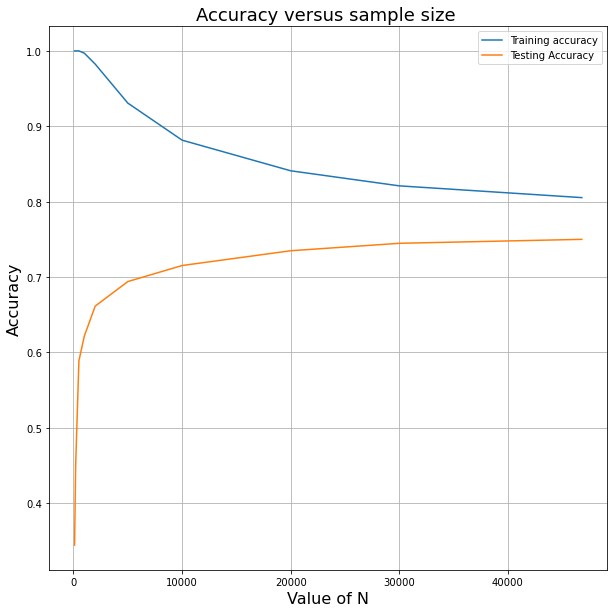

In [26]:
plt.figure(figsize=(10,10))
x1 = N 
y1 = acc_score_train
plt.plot(x1, y1, label = "Training accuracy")
x2 = N
y2 = acc_score_test 
plt.plot(x2, y2, label = "Testing Accuracy")
plt.xlabel('Value of N',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy versus sample size ',fontsize=18)
plt.legend()
plt.grid()
plt.show()

(2) ***Your answer goes here***

The plot is a Learning curve of the problem. We used varying training data size with the same test data size. Ideally it would be better to draw a new test sample each time, but except for synthetic benchmarks with a known distribution, it would be a bit tricky to acquire those. Hence the plot only refers to the size of the training set and not the size of the test set. We can see from the plot that with samples less than 500 the model accuracy for training set is above 95% and for testing is near 0. This shows that the model would overfit the training set and perform poorly on the testing set. As the number of samples increase the accuracy for training set decreases whereas the accuracy for testing set increases up to a point where the accuracy of both testing and trainings set are very close by. We can see that around 30,000 samples both lines in the graph become parallel. Training accuracy is near to 80% and testing accuracy is around 75%.  A large training set decreases the accuracy score because it very difficult for the learning algorithm to learn a model that correctly represents all the training data however, meanwhile testing accuracy increases due to an increase in the model’s ability to generalize. As you can see, both lines in the plot reach a limit on the right size. This means that to learn properly, an algorithm requires enough data, just enough for us to get to the right side of this plot. Once we reach that asymptote, we cannot improve the test score by using more training data.

\pagebreak

# ========== Question 2.3 --- [6 marks] =========

We cosinder applying Support Vector Machines (SVMs) to the data set, using sklearn.svm.SVC().
For each of the two conditions shown below, carry out a classification experiment, report classification accuracy and confusion matrix (in numbers instead of in graphical representation such as heatmap) for the test set. You may share code between the two conditions. Make sure that you use Xtrn_nm for training and Xtst_nm for testing.

1. [Code] Condition A: SVM with a linear kernel and C=1
2. [Code] Condition B: SVM with a RBF kernel and C=1. 
3. [Text] Discuss your findings, comparing the results for the two conditions.

In [11]:
#(1) Your code goes here
svm_lin=sklearn.svm.SVC(kernel="linear",C=1)
svm_lin.fit(Xtrn_nm,Ytrn)
y_true_linear,y_pred_linear=Ytst,svm_lin.predict(Xtst_nm)
print("The accuracy score for condition A is={:0.4f}".format(accuracy_score(y_true_linear,y_pred_linear)))
print(confusion_matrix(y_true_linear, y_pred_linear))

The accuracy score for condition A is=0.7918
[[246   0   2   1   1   1   3   0   0   0   5   1   1   2  10   0   6   0
    6   0   4   1   3   0   0   7]
 [  2 272   0   2   1   2   1   8   1   0   0   5   1   1   1   0   0   0
    1   1   0   0   0   0   0   1]
 [ 11   0 258   0  14   0   0   1   0   0   1   3   0   0   3   2   1   1
    1   1   2   0   0   0   0   1]
 [  3   7   1 252   0   1   3   3   1  13   1   0   0   1   4   0   0   0
    1   1   3   2   0   2   0   1]
 [  7   0  25   1 243   1   0   1   0   0   3   0   0   1   3   0   3   7
    1   2   0   0   1   0   0   1]
 [  0   0   0   0   1 244   1   1   2   3   4   1   0   0   1  17   5   2
    3  12   0   0   0   0   3   0]
 [ 16   2   3   2   1   6 171   0   0   6   0   0   0   3   1   3  68   2
    4   0   1   0   1   0   8   2]
 [  2   8   0   3   0   1   0 253   3   1   7  12   1   6   0   0   1   0
    0   1   0   1   0   0   0   0]
 [  0   1   0   1   0   7   2   2 191   9   0  69   0   0   0   0   0   4
    2   4

Text(0.5, 159.0, 'Predicted label')

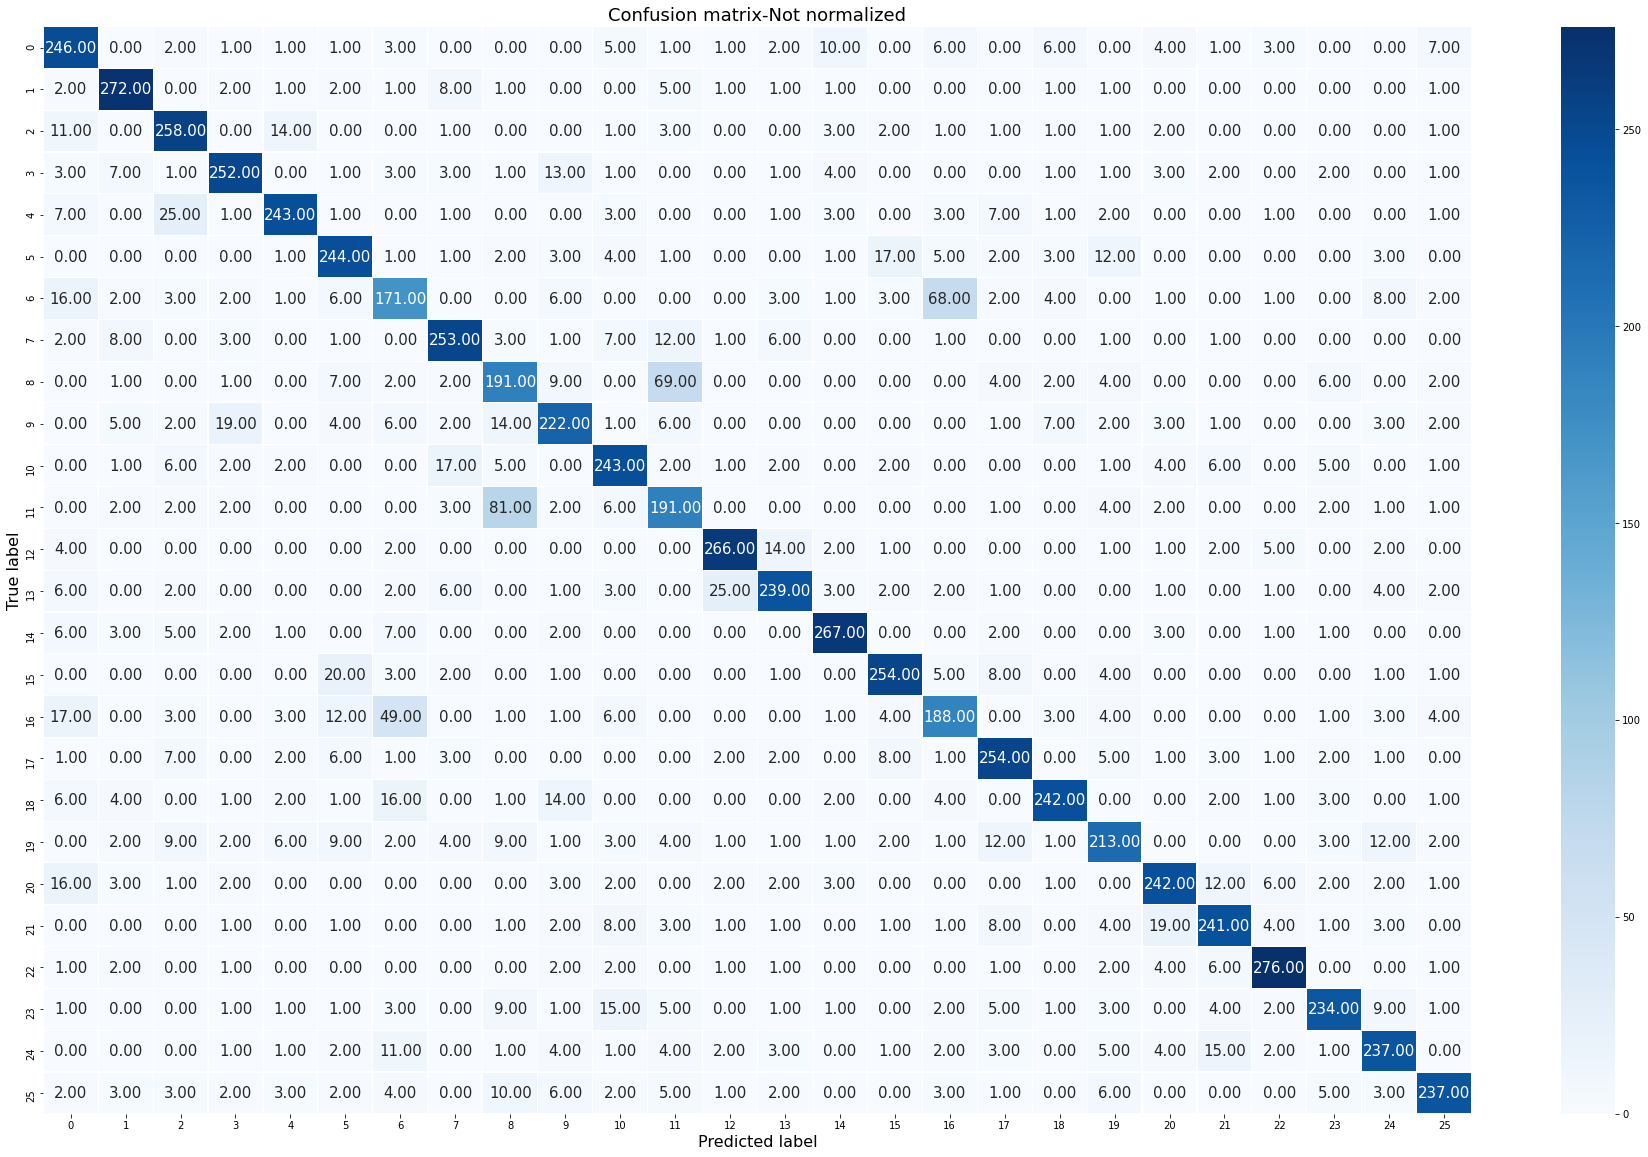

In [5]:
plt.figure(figsize=(32,20))

alphabet_arr = np.array(list(string.ascii_lowercase))
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix Normalized'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True,fmt=".1f",annot_kws={"size":15})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.,annot=True,fmt=".1f",annot_kws={"size":15})
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm=confusion_matrix(y_true_linear, y_pred_linear)
sns.heatmap(cm,annot=True,linewidths=.12,cmap="Blues",fmt=".2f",annot_kws={"size":15})
plt.title("Confusion matrix-Not normalized",fontsize=18)
plt.ylabel('True label',fontsize=16)
plt.xlabel('Predicted label',fontsize=16)


In [12]:
#(2) Your code goes here
svm_rbf=sklearn.svm.SVC(kernel="rbf",C=1)
svm_rbf.fit(Xtrn_nm,Ytrn)
y_true_rbf,y_pred_rbf=Ytst,svm_rbf.predict(Xtst_nm)
print("The accuracy score for condition B is={:0.4f}".format(accuracy_score(y_true_rbf,y_pred_rbf)))
print(confusion_matrix(y_true_rbf, y_pred_rbf))

The accuracy score for condition B is=0.8942
[[277   0   1   0   1   0   3   0   0   0   2   0   0   2   8   0   3   0
    2   0   0   0   0   0   0   1]
 [  1 280   0   0   0   2   1   4   0   1   0   2   1   0   2   0   0   0
    0   4   1   0   1   0   0   0]
 [  3   0 278   0   9   0   0   0   0   0   1   1   0   0   3   1   0   2
    0   0   0   0   0   0   0   2]
 [  3   0   1 278   0   1   1   0   1   5   0   2   0   1   4   0   0   0
    0   0   0   0   0   0   0   3]
 [  5   0  10   1 275   1   1   1   0   0   0   0   0   0   1   1   2   0
    0   2   0   0   0   0   0   0]
 [  0   0   0   1   0 265   4   0   1   0   1   2   1   0   0  11   1   1
    0  10   0   0   0   0   2   0]
 [ 17   2   0   2   0   0 193   0   0   1   0   0   0   1   0   1  77   1
    2   0   0   0   0   0   3   0]
 [  0   0   0   3   0   1   0 274   2   0   4   8   0   6   0   0   1   0
    0   1   0   0   0   0   0   0]
 [  0   1   1   1   0   0   1   1 225   4   0  63   0   0   0   0   1   2
    0   0

Text(0.5, 159.0, 'Predicted label')

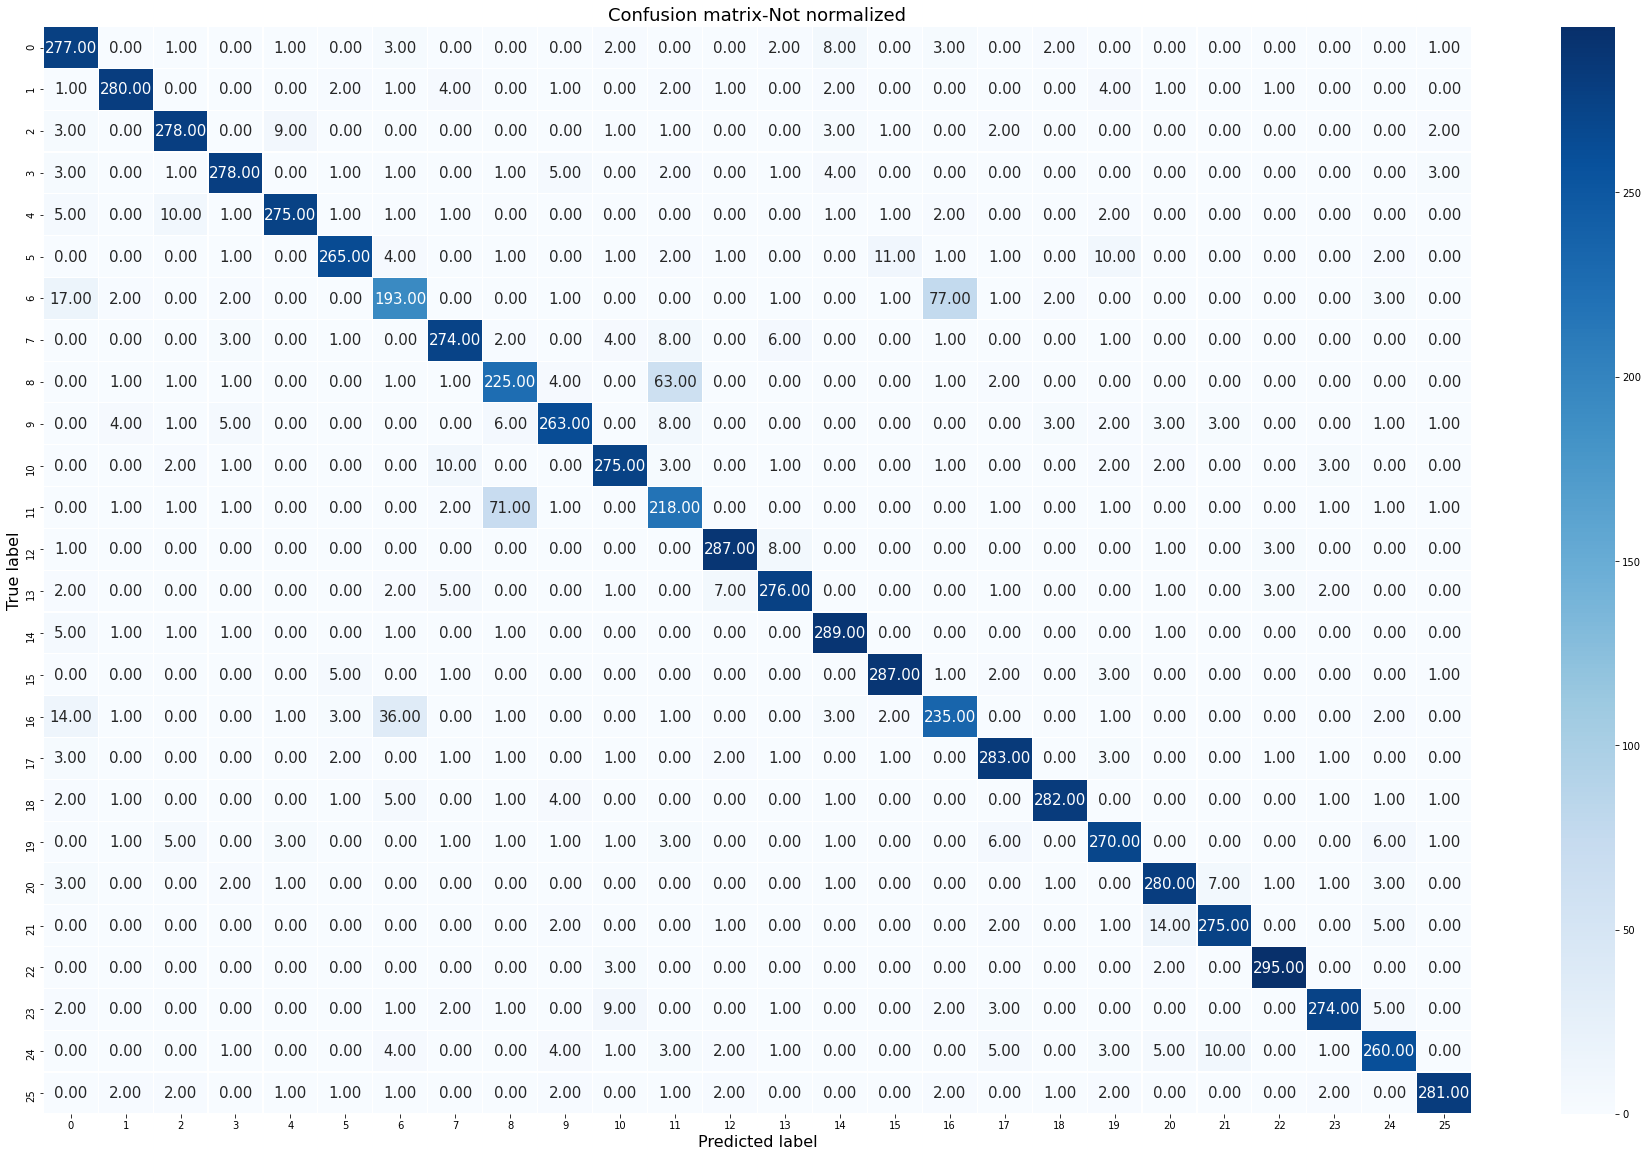

In [7]:
plt.figure(figsize=(32,20))
cm=confusion_matrix(y_true_rbf, y_pred_rbf)
sns.heatmap(cm,annot=True,linewidths=.12,cmap="Blues",fmt=".2f",annot_kws={"size":15})
plt.title("Confusion matrix-Not normalized",fontsize=18)
plt.ylabel('True label',fontsize=16)
plt.xlabel('Predicted label',fontsize=16)


(3) ***Your answer goes here***

Th classification accuracy of Linear classifier is 79.17% where as that of RBF is 89.42%. This means that the problem is non-linear. We can also see that the total number of True possitives on the diagonal are much higher in non-linear RBF kernel then in linear kernel. The confusion matrices below shows the two letters which are missclassified with each other and the type of kernel suitable for these kinds of letters. The vertical side represents actual labels and the horizontal represents predicted labels. 

1) Misclassification of letter "c" and "e"<br>
We can see that in Linear kernel these two letters are missclassified more then the RBF kernel. 

Linear |4 (e) |2(c)     
-----|-----|----- 
4 (e)|TP:243|FN:25
2(c)|FP:14|TN:258


RBF |4 (e) |2(c)
-----|-----|----- 
16(e)|TP:275|FN:10
2(c)|FP:9|TN:278

2) Misclassification of letter "q" and "g"<br>
These two letters are highly missclassified in the entire dataset.However, we can see that the RBF kernel missclassifies "g" with "q" with a false positive of 77.


Linear |16(q) |6(g)     
-----|-----|----- 
16(q)|TP:188|FN:49
6(g)|FP:68|TN:171


RBF |16(q) |6(g)     
-----|-----|----- 
16(q)|TP:235|FN:36
6(g)|FP:77|TN:193

2) Misclassification of letter "l" and "i"<br>
The letters "l" and "i" are missclassified as they look the same when "i" is in uppercase. RBF missclassifies it as well but less then linear kernel.


Linear |11(l) |8(i)     
-----|-----|----- 
11(I)|TP:191|FN:81
8(i)|FP:69|TN:191

RBF |11(l) |8(i)     
-----|-----|----- 
11(I)|TP:218|FN:71
8(i)|FP:63|TN:225


This experiment shows that RBF kernel is more suited to this dataset (the dataset is non-linear) which can extract non-linear features from the images of the handwritten labels.



\pagebreak

# ========== Question 2.4 --- [12 marks] ==========

We used default parameters for the SVM in Question 2.2. We now want to tune the parameters by using cross-validation. 

1. [Text] Explain why we employ cross validation to determine the value of C.
2. [Code] To reduce the time for experiments, you pick up the first 400 training samples from each class (from 0 ('a') to 25 ('z') to create Xsmall, so that Xsmall contains 400\*26=1040 samples in total and its first 400 samples correspond to 'a' and the last 400 to 'z'. Accordingly, you create labels, Ysmall.
By using a 3-fold cross validation and Xsmall only, estimate the classification accuracy of an SVM classifier with RBF kernel, while you vary the penalty parameter C in the range $10^{-2}$ to $10^4$ (use 13 values spaced equally log space, where the logarithm base is 10). Set the kernel coefficient parameter gamma to 'auto' for this question. You should use sklearn.model_selection.cross_val_score.
Display the mean cross-validation classification accuracy for each C, and plot it against C by using a log-scale for the x-axis.
3. [Text] Report the highest obtained mean accuracy score and the value of C which yielded it.

(1) ***Your answer goes here***

Cross-validation is a technique in which we train our model using the subset of the dataset and then evaluate using the complementary subset of the dataset. We split the data into K different splits where we keep one split for testing and the rest for training. We then tune the model with all the values of “C”, then calculate accuracy and error score. We apply the same technique to the next split and choose the value of “C” with highest accuracy or the lowest error score. This holding out part of data in the form of test set can avoid over fitting of the soft margin classification of SVM. Cross validation would tune the hyperparameter “C” in a way that the model would be able to generalize more on unseen data.

In [4]:
#(2) Your code goes here
def find(lst, a):
    return [i for i, x in enumerate(lst) if x==a]

X_small=np.array([])
Y_small=np.array([])
for i in range(0,26):
    index=find(Ytrn,i)
    data=Xtrn[index]
    data=data[0:400]
    X_small=np.concatenate([X_small,data]) if X_small.size else data  

    
for j in range(0,26):
    indic=find(Ytrn,j)
    Y=Ytrn[indic]
    Y=Y[0:400]
    Y_small=np.concatenate([Y_small,Y]) if Y_small.size else Y
    
print(X_small.shape,Y_small.shape)


(10400, 784) (10400,)


In [5]:
x=np.logspace(-2,4,13)
scores=[]
cross_val=[]
cv = sklearn.model_selection.StratifiedKFold(n_splits=3)        
for i in np.logspace(-2,4,13):
    svc=SVC(kernel='rbf',gamma="auto",C=i)      
    cross_val.append(cross_val_score(svc,X_small,Y_small,cv=cv))
                  

In [6]:
cross_val_tot=[]
for x in cross_val:
    cross_val_tot.append(x.mean(axis=0))
print(cross_val_tot)


[0.4191383956877954, 0.4191383956877954, 0.6060592846586448, 0.6932696504336521, 0.7569233960536774, 0.7943270857095558, 0.8122117846429721, 0.8123077350689737, 0.8113464277509381, 0.8085578459570418, 0.8047120064191083, 0.8025004586702208, 0.8001927385804986]


In [11]:
for c, x in zip(np.logspace(-2,4,13),cross_val_tot):
    print("For value of C={:0.2f} and cross validation accuracy={:0.5f}".format(c,x))

For value of C=0.01 and cross validation accuracy=0.41914
For value of C=0.03 and cross validation accuracy=0.41914
For value of C=0.10 and cross validation accuracy=0.60606
For value of C=0.32 and cross validation accuracy=0.69327
For value of C=1.00 and cross validation accuracy=0.75692
For value of C=3.16 and cross validation accuracy=0.79433
For value of C=10.00 and cross validation accuracy=0.81221
For value of C=31.62 and cross validation accuracy=0.81231
For value of C=100.00 and cross validation accuracy=0.81135
For value of C=316.23 and cross validation accuracy=0.80856
For value of C=1000.00 and cross validation accuracy=0.80471
For value of C=3162.28 and cross validation accuracy=0.80250
For value of C=10000.00 and cross validation accuracy=0.80019


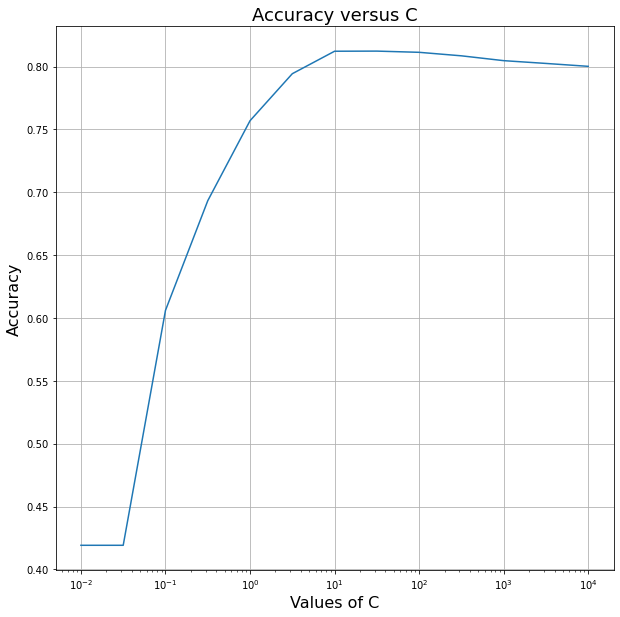

In [16]:
plt.figure(figsize=(10,10))
plt.plot(np.logspace(-2,4,13),cross_val_tot)
plt.xscale("log")
plt.title("Accuracy versus C",fontsize=18)
plt.xlabel("Values of C",fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.grid()
plt.show()

(3) ***Your answer goes here***
The highest obtained mean accuracy is 81.2307% which for C=31.622 and accuracy 81.2211% for C=10. For our convinience we can say the highest reported accuracy comes from C=10

\pagebreak

# ========== Question 2.5 --- [20 marks] ==========

We now want to improve the classification accuracy for the multiclass logistic regression model from the one obtained in Question 2.1. Answer the following questions.
1. [Text] Discuss possible approaches, and decide the one you implement. Note that you should not use other classification models, but you should stick to the multiclass regression approach.
2. [Code] Implement the approach you have chosen, carry out a classification experiment, and report accuracy for the training set and test set.
3. [Text] Make a quick investigation to the result and report your findings.

(1) ***Your answer goes here***
The following methods can be used to improve the accuracy of multiclass logistic regression:<br>
1)	Feature Scaling and Normalization: We can normalize all features to the same scale before putting them in a machine learning model. It is a way to standardize the independent features present in the data to a fixed range. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values. Examples of feature scaling are Min-Max normalization and standardization.<br>

2)	Class Imbalance: Adjusting the class imbalance parameter in logistic regression can improve the classification accuracy. We can also under sample the majority class samples. It removes some of the samples of the majority class.<br>

3)	Adding to more features can improve the class accuracy. However, optimal number of features should be added t avoid overfitting. Adding more feature can make the model more complex. To avoid over-fitting and at the same time doing variable selection apply a LASSO regularizer, it will both penalize model complexity and induce sparsity.<br>

4) Turing the regularization hyperparamenter such as C can also improve the accuracy of the model. An optimal value of C can significatntly boost the performance of the model. <br>

5)	Data augmentation: Specific to this data set, data augmentation has been a proven technique to improve classification accuracy. We would generate images by shifting pixels to each side or shift them diagonally. This technique would increase the number of images in the dataset consequently improving the accuracy.<br>
We would be using data augmentation technique to improve the classification accuracy of our model where we would be shifting the letter of each image to each side (one pixel). This would increase the number of imahes in the training set. Consequently the accuracy of the model on the test set increases.


In [5]:
#(2) Your code goes here
from scipy.ndimage.interpolation import shift
X_train,X_test,y_train,y_test=Xtrn_nm,Xtst_nm,Ytrn,Ytst

def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])


# Creating Augmented Dataset
X_train_augmented = [image for image in X_train]
y_train_augmented = [image for image in y_train]

for dx, dy in ((1,0), (-1,0), (0,1), (0,-1)):
     for image, label in zip(X_train, y_train):
            X_train_augmented.append(shift_image(image, dx, dy))
            y_train_augmented.append(label)
 

# Shuffle the dataset
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = np.array(X_train_augmented)[shuffle_idx]
y_train_augmented = np.array(y_train_augmented)[shuffle_idx]


mult =sklearn.linear_model.LogisticRegression(multi_class='multinomial',C=1, solver="lbfgs")
mult.fit(X_train_augmented, y_train_augmented)
y_true_train,y_pred_train=y_train_augmented,mult.predict(X_train_augmented)
print("Training accuracy",accuracy_score(y_true_train,y_pred_train))

y_true_test,y_pred_test=y_test,mult.predict(X_test)
print("Testing accuracy",accuracy_score(y_true_test,y_pred_test))

misclassified = np.where(Ytst != y_pred_test)
misclassified_labels=Ytst[misclassified]
unique, counts=np.unique(misclassified_labels,return_counts=True)
alphabet_arr = np.array(list(string.ascii_lowercase))
zipped_set = set(zip(alphabet_arr,unique, counts))
res = sorted(zipped_set, key = lambda x: x[2],reverse=True) 
print("Misclassified samples",res)


Training accuracy 0.7526495726495727
Testing accuracy 0.7662820512820513
Misclassified samples [('g', 6, 154), ('l', 11, 140), ('t', 19, 115), ('q', 16, 114), ('i', 8, 109), ('a', 0, 91), ('y', 24, 89), ('x', 23, 77), ('u', 20, 72), ('j', 9, 70), ('v', 21, 70), ('f', 5, 68), ('k', 10, 65), ('z', 25, 61), ('e', 4, 61), ('s', 18, 57), ('n', 13, 56), ('r', 17, 49), ('h', 7, 48), ('c', 2, 48), ('d', 3, 46), ('p', 15, 39), ('b', 1, 35), ('o', 14, 34), ('m', 12, 33), ('w', 22, 22)]


Previous Training accruracy $=0.8056410256410257$ <br>
Previous Testing accruracy $=0.7515384615384615$<br>
Missclassified previously $[('g', 6, 151), ('l', 11, 130), ('q', 16, 122), ('i', 8, 121), ('t', 19, 109), ('a', 0, 94), ('x', 23, 88), ('y', 24, 84), ('j', 9, 81), ('k', 10, 78), ('v', 21, 76), ('u', 20, 75), ('z', 25, 70), ('s', 18, 67), ('f', 5, 66), ('e', 4, 62), ('n', 13, 60), ('c', 2, 56), ('d', 3, 56), ('r', 17, 52), ('h', 7, 50), ('p', 15, 46), ('b', 1, 42), ('o', 14, 38), ('m', 12, 37), ('w', 22, 27)]$

(3) ***Your answer goes here***

Indeed, the classification accuracy increases by 1.47% (from 75.15% to 76.62 %) with data augmentation. The training accuracy is 75.26% which is lower than the previous accuracy (80.56%)  that shows that previously the model overfitted the data. We also find that the number of total misclassifications of has decreased i.e. Most of the letters have decreased number of misclassifications. However, some letters have increased misclassifications such as lowercase "L".

\pagebreak

# Question 3  Classification of sequential data

#### 32 marks out of 163 for this coursework

### Human Activity Recognition data set (UniMiB SHAR)

The aim of this task is to predict types of activities of daily living (ADL) from acceleration samples acquired with a smartphone. We use a subset of [UniMiB SHAR Activities](http://www.sal.disco.unimib.it/technologies/unimib-shar/).
Activities of 30 people (subjects) were recorded at a sampling frequency of 50Hz and parameterised as a fixed-length sequence of (x,y,z)-accelaration vectors. Each sample is represented as a vector of 453 elements, whose original shape was 151-by-3.
There are nine activities:'StandingUpFS', 'StandingUpFL', 'Walking', 'Running', 'GoingUpS', 'Jumping', 'GoingDownS', 'LyingDownFS', 'SittingDown'.

For training and evaluation, we employ leave-one-subject-out cross-validation, in which, for each of 30 subjects, the data of the remaining 29 subjects is used for training and the data of the left-out subject is used for validation (testing).
We will mainly employ ***macro F1 score*** as the evaluation measure. Note that we can not expect good F1 scores for test data in this question. Scores of around 0.4 are even possible.

### Loading data: ###

Upload the data set files, 'adl_data.mat', 'adl_labels.mat', 'adl_train_idxssubjective_folds.mat', and 'adl_test_idxssubjective_folds.mat' to your environment, and run the following cell.

In [3]:
# Load the data set and apply some changes
from iaml02cw2_helpers import *
X, Y, train_idx, test_idx = load_UniMiB_SHAR_ADL()
# Change labels and indices for Python (zero-indexing)
Y = Y-1
train_idx = train_idx - 1
test_idx = test_idx - 1


- X: whole data (shape=(7579,453))
- Y: labels for X (shape=(7579,3)).The first columns is the type of activity, second column is the subject number, and third column is the gender of the subject.
- train_idx: list of training data indices for the leave-one-subject-out. For subject k, train_idx\[k\] gives indices to X that should be used for training
- test_idx:  list of test data indices for the leave-one-subject-out. For subject k, test_idx\[k\] gives indices to X that should be used for testing

\pagebreak

# ========== Question 3.1--- [7 marks] ==========

Answer the following questions: 
1. [Code] Using a barplot, plot the frequency of each activity in the whole data set.
2. [Text] Explain your findings and discuss possible issues with the data set when we use it for activity classification tasks.

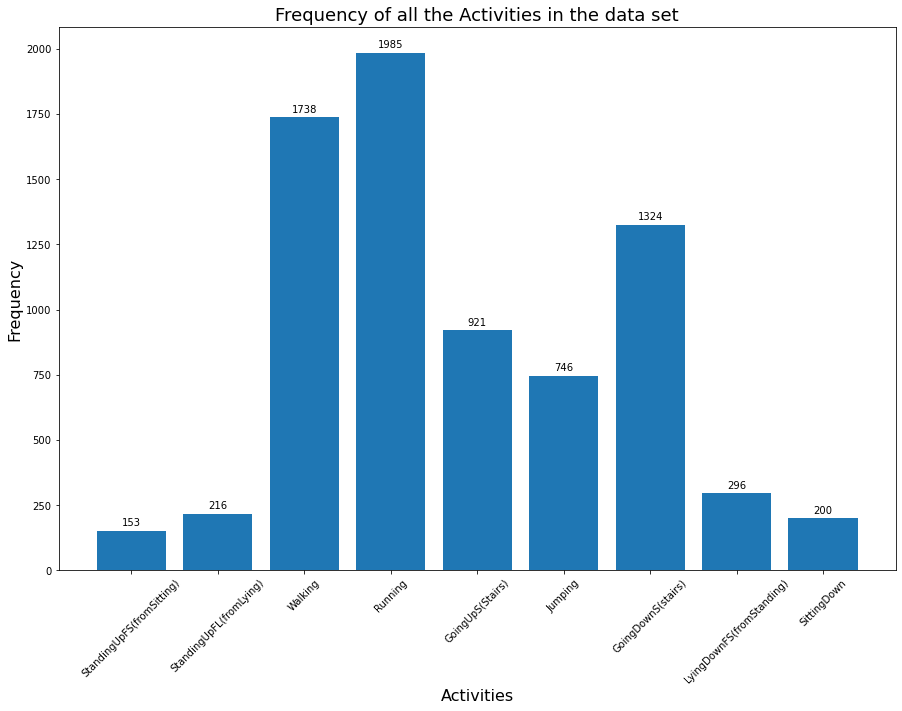

In [26]:
#(1) Your code goes here
fig, ax = plt.subplots(figsize=(15,10))
activities=['StandingUpFS(fromSitting)', 'StandingUpFL(fromLying)', 'Walking', 'Running', 
            'GoingUpS(Stairs)', 'Jumping', 'GoingDownS(stairs)', 'LyingDownFS(fromStanding)', 'SittingDown']
unique,counts=np.unique(Y[:,0],return_counts=True)

rect=ax.bar(activities,counts)

def autolabel(rects):
    
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.xticks(rotation=45)
plt.xlabel("Activities",fontsize=16)
plt.ylabel("Frequency",fontsize=16)
plt.title("Frequency of all the Activities in the data set",fontsize=18)
autolabel(rect)
plt.show()

(2) ***Your answer goes here***

The bar graph above shows 9 different activities. We can see that most of the data comprises of running and walking followed by going downstairs and upstairs. We can see that the samples related to different activities are of different size. Therefore, the first challenged imposed on the classifier would be of class imbalance.
There can be high level of misclassifications between these activities such as Standing up from laying, that can be classified as Standing up from sitting, lying down can be confused with standing and Sitting down, going upstairs and Walking, going downstairs and Walking, Jumping and Going downstairs.
Once we look at the count plot of gender column, we can find that dataset is not balanced in term of male and female subjects. Moreover, personalization is not employed in the dataset. Human subject performs activities in a different way, and this influences the recognition accuracy especially when it is necessary to distinguish between fine grained types of activities. To make the classifier subject independent we use subject-out cross validation later.


\pagebreak

# ========== Question 3.2--- [10 marks] ==========

Answer the following questions: 
1. [Code] Carry out an experiment with k-nearest neighbours classification with the Euclidean distance measure for k = 1, 2, 3, 5, 7, 10, display *macro F1 scores* for training and testing, and plot the scores on a single figure. Make sure that you employ leave-one-subject-out cross validation.
2. [Text] Discuss your findings.

In [54]:
#(1) Your code goes here
#With Euclidean distance calculations
Yn=Y[:,0]
Xn= pd.DataFrame(X)

f1_train_macro=[]
f1_test_macro=[]
f1_train_mean=[]
f1_test_mean=[]

K=[1, 2, 3, 5, 7, 10]
for k in K:
    model = KNeighborsClassifier(n_neighbors=k, metric='precomputed')
    for subject in range(1, 30):
        train_id,test_id = train_idx[subject][0].flatten(), test_idx[subject][0].flatten()
        try:
            X_train, X_test = Xn.loc[train_id], Xn.loc[test_id]
            Y_train, Y_test =  Yn[train_id], Yn[test_id]
            X_train_matrix = euclidean_distances(X_train, X_train)
        except KeyError as e:
            print(e)    
        model.fit(X_train_matrix, Y_train)
        Y_pred_train=model.predict(X_train_matrix)
        f1_train_macro.append(f1_score(Y_train,Y_pred_train,average="macro"))
        
        X_test = euclidean_distances(X_test, X_train)
        Y_pred_test=model.predict(X_test)
        f1_test_macro.append(f1_score(Y_test,Y_pred_test,average="macro"))        
        
    f1_train_mean.append(mean(f1_train_macro))
    f1_test_mean.append(mean(f1_test_macro))
    print("Computed for value of k={}".format(k))
print("f1 train for k='{}' is {}".format(K, f1_train_mean))
print("f1 test for k='{}' is {}".format(K, f1_test_mean))           


Computed for value of k=1
Computed for value of k=2
Computed for value of k=3
Computed for value of k=5
Computed for value of k=7
Computed for value of k=10
f1 train for k='[1, 2, 3, 5, 7, 10]' is [1.0, 0.9711571849751045, 0.9595501960155588, 0.9415207231394285, 0.9244049285507501, 0.9050210582534761]
f1 test for k='[1, 2, 3, 5, 7, 10]' is [0.6088999839029928, 0.5889342009988364, 0.5866493008318487, 0.582875038670929, 0.5761352214550537, 0.5668530417206902]


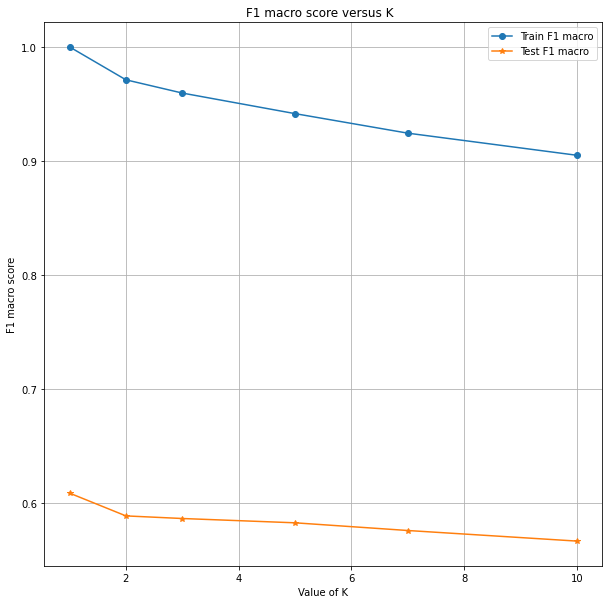

In [55]:
plt.figure(figsize=(10,10))
x1 = K 
y1 = f1_train_mean
plt.plot(x1, y1, label = "Train F1 macro",marker="o")
x2 = K
y2 = f1_test_mean
plt.plot(x2, y2, label = "Test F1 macro",marker="*")
plt.xlabel('Value of K')
plt.ylabel('F1 macro score')
plt.title('F1 macro score versus K  ')
plt.legend()
plt.grid()
plt.show()

(2) ***Your answer goes here***

Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial. We calculate the F1 macro of the dataset incorporating one subject out cross validation so that the result is subject independent. We use F1 score because of class imbalance and FP FN are taken into consideration. We applied the “macro” F1 score so that we can understand the performance of the overall data. F1 macro calculates per class precision and recall. Then it calculates per class F1 score and average it up across all the classes. The best-case performance of F1-score is 1 and the worse case is 0. From the plot we can see that at k=1 the dataset has the best F1-score for both training set and testing set. This means that there is perfect balance between recall and precision. However, when k increases then F1-score of both the training and testing set decreases. In other words, there are more false positives and false negatives. We can see that testing F1 score is particularly low then training F1 scores which is a sign of overfitting of the training data set. 

\pagebreak

# ========== Question 3.3--- [15 marks] ==========

We now consider using Gaussian Mixture Models (GMMs) in sklearn, where we employ a GMM for each activity class $C_i$ to estimate $p(X|C_i)$. In classification, we find the class $C_j$ such that $P(X,C_j) > P(X,C_i)$ for $i \neq j$, where $P(X,C_i) = P(X|C_i)P(C_i)$. We assueme equal prior probabilities, i.e., $P(C_i) = \frac{1}{9}$ for all $i$ in this question.

1. [Code] Train GMMs with diagonal covariance matrices on the training data and calculate the per-sample average log likelihood  and macro-F1 score on the training data and test data for each K = 1,2,3,5,10,20,40, where K denotes the number of mixture components.
Display the obtained likelihood values and F1 scores in separate tables, where columns correspond to K and rows correspond to training data and test data, providing a right table title.
Plot the likelihoods and F1 scores in separate graphs, where x-axis represents K, using different colours and marks for training and test conditions, and providing a right figure title.
Make sure that you employ leave-one-subject-out cross validation to obtained the requested information. Note that, in each cross validation, you should first obtain a per-sample average log likelihood for each class using the data of that class instead of the whole data, and obtain unweighted average over all the classes irrespective of class size. 
2. [Text] Discuss your findings, compareing the results for training and testing.

# CHECKING HARD CLUSTERS

[3433286.999999989, 2609554.158303435, 2331005.7046706537, 2128422.5102055063, 1994591.0814785096, 1916432.6838877597, 1853978.827526551, 1816399.949192995, 1775069.1977988835, 1745119.78126569, 1718714.234086571, 1702620.2256020198, 1676474.3301429104, 1658353.1791562908]


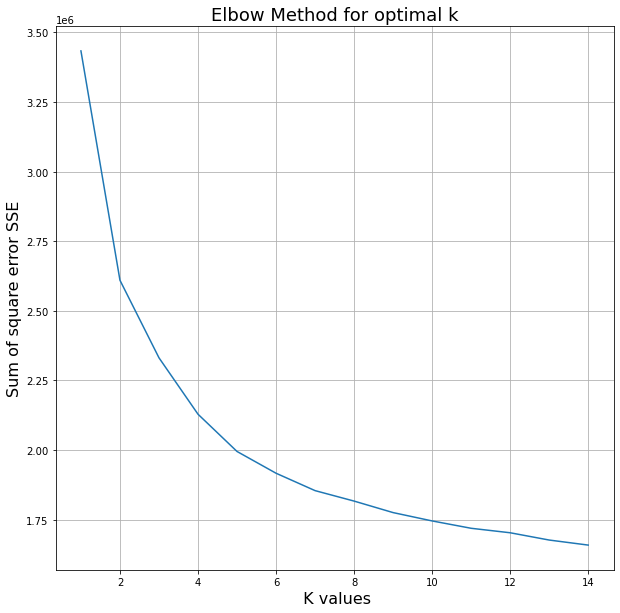

In [4]:
#Checking the hard clustrering first

scale=StandardScaler()
X_scale=scale.fit_transform(X)
k_vals=range(1,15)
sse_kmc=[]
for ii in (k_vals):
    kmc=KMeans(n_clusters=ii)
    kmc.fit(X_scale)
    scores_km=kmc.inertia_
    sse_kmc.append(scores_km)
print(sse_kmc)
%matplotlib inline
plt.figure(figsize=(10,10))
plt.plot(k_vals,sse_kmc)
plt.xlabel(" K values",fontsize=16)
plt.ylabel("Sum of square error SSE",fontsize=16)
plt.title("Elbow Method for optimal k",fontsize=18)
plt.grid()

By looking at the KMeans hard clustering we can see that optimal clusters are approximately 5

# USING GMM.SCORES TO CALCULATE LOGLIKELIHOOD FOR EACH CLASS

In [3]:
#LOG_LIKELIHOOD AND F1-SCORE MACRO FOR EACH CLASS USING CLASS DATA (USING SCORES)

def find(lst, a):
    return [i for i, x in enumerate(lst) if x==a]

Y_new=Y[:,0]
X_new=X
ff_train=[]
ff_test=[]
ss_train=[]
ss_test=[]


score_final_train=[]
score_final_test=[]
f1_final_train=[]
f1_final_test=[]


K=[1,2,3,4,5,10,20,40]  #3,4,5,10,20,40

for cl in range(0,8):
    for k in K:
        for a in range(1,30):
            train_id,test_id = train_idx[a][0].flatten(), test_idx[a][0].flatten()
            X_train, X_test, y_train, y_test = X_new[train_id], X_new[test_id], Y_new[train_id], Y_new[test_id]  
            
            index_train=find(y_train,cl)
            X_tr=X_train[index_train]
            Y_tr=y_train[index_train]
            
            index_test=find(y_test,cl)
            X_te=X_test[index_test]
           

            if not X_te.any() or X_te.shape[0]<40:
                pass
            else:
                Y_te=y_test[index_test]
                gmm=GaussianMixture(covariance_type="diag",n_components=k)
                y_pred_train=gmm.fit_predict(X_tr) 
                y_pred_test=gmm.fit_predict(X_te)
                             
            
                
                ss_train.append(gmm.score(X_tr)*X_tr.shape[0]*(1/9))           
                ss_test.append(gmm.score(X_te)*X_te.shape[0]*(1/9))
                
                ff_train.append(f1_score(Y_tr,y_pred_train,average="macro"))
                ff_test.append(f1_score(Y_te,y_pred_test,average="macro"))
                
                
        if not ff_train or not ff_test:
            pass
        else:
            print("\n")
            score_final_train.append(sum(ss_train))
            score_final_test.append(sum(ss_test))
            f1_final_train.append(sum(ff_train)/len(ff_train))
            f1_final_test.append(sum(ff_test)/len(ff_test))
            print("For clas {} and k= {} the log_lik-train is {:0.4f}".format(cl,k,sum(ss_train)))           
            print("For clas {} and k= {} the log_lik-test is {:0.4f}".format(cl,k,sum(ss_test)))
            print("\n")
                      
            print("For clas {} and k= {} the F1-score-train is {:0.4f}".format(cl,k, sum(ff_train)/len(ff_train)))           
            print("For clas {} and k= {} the F1-score-test is {:0.4f}".format(cl,k, sum(ff_test)/len(ff_test))) 





For clas 2 and k= 1 the log_lik-train is -14654266.3402
For clas 2 and k= 1 the log_lik-test is -169346.2241


For clas 2 and k= 1 the F1-score-train is 0.0000
For clas 2 and k= 1 the F1-score-test is 0.0000


For clas 2 and k= 2 the log_lik-train is -31196173.3634
For clas 2 and k= 2 the log_lik-test is -320934.5560


For clas 2 and k= 2 the F1-score-train is 0.0000
For clas 2 and k= 2 the F1-score-test is 0.0000


For clas 2 and k= 3 the log_lik-train is -50587527.4394
For clas 2 and k= 3 the log_lik-test is -464728.9226


For clas 2 and k= 3 the F1-score-train is 0.0429
For clas 2 and k= 3 the F1-score-test is 0.0423


For clas 2 and k= 4 the log_lik-train is -75834621.7140
For clas 2 and k= 4 the log_lik-test is -603040.9077


For clas 2 and k= 4 the F1-score-train is 0.0580
For clas 2 and k= 4 the F1-score-test is 0.0548


For clas 2 and k= 5 the log_lik-train is -101780620.3534
For clas 2 and k= 5 the log_lik-test is -735705.4153


For clas 2 and k= 5 the F1-score-train is 0.05

# CREATING TABLES AND GRAPHS FOR F1 SCORE AND LOG LIKELIHOODS

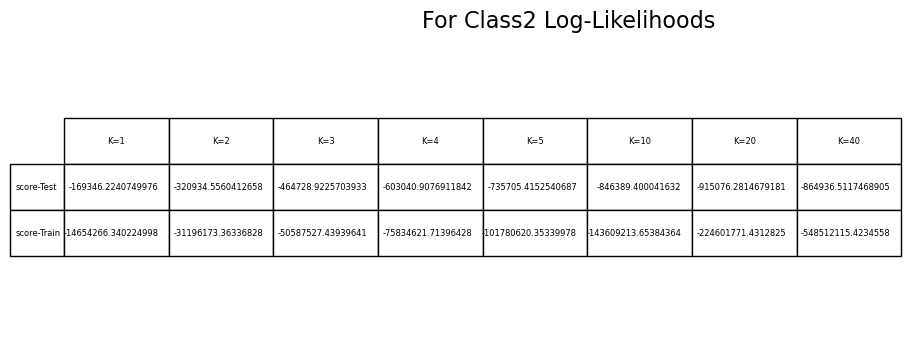

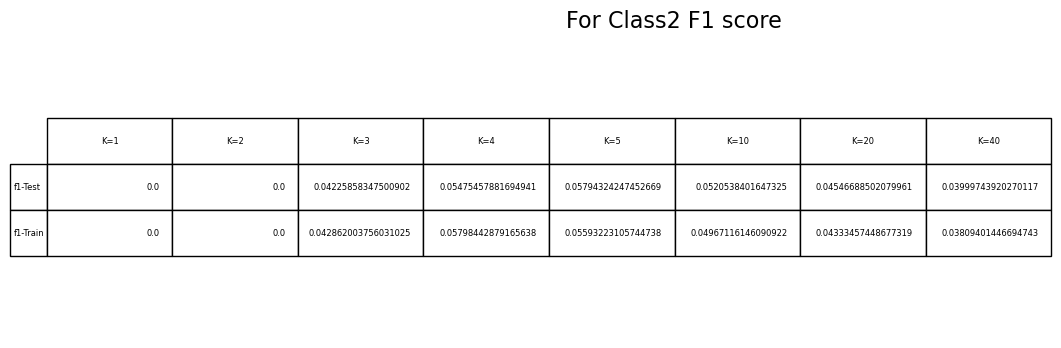

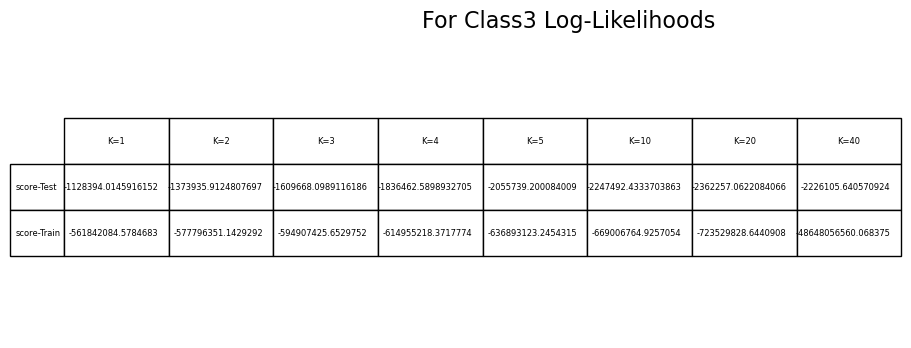

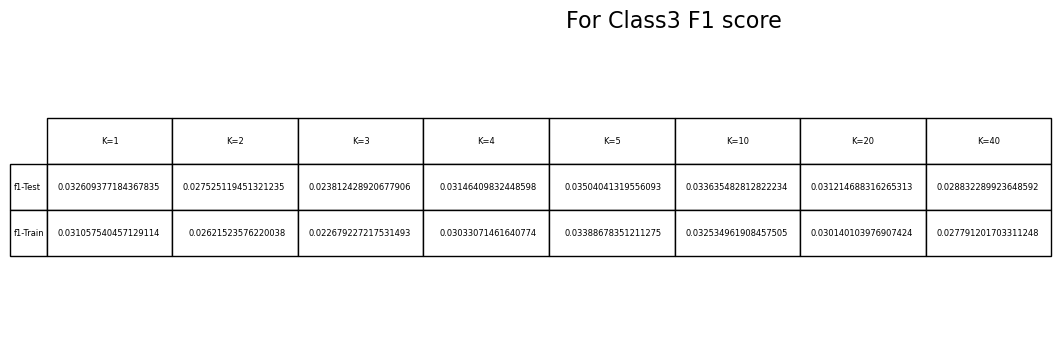

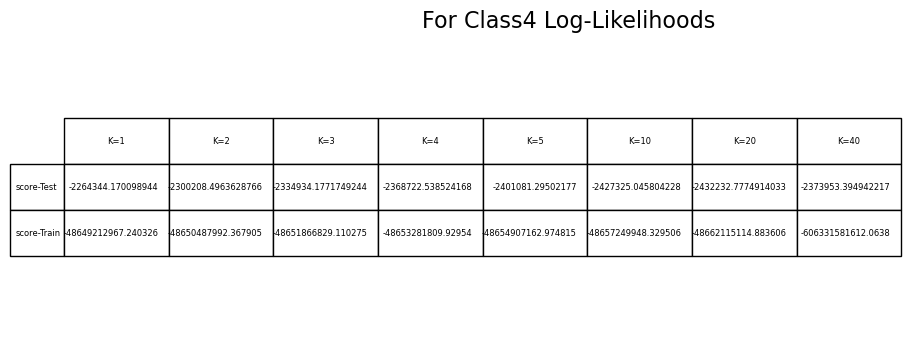

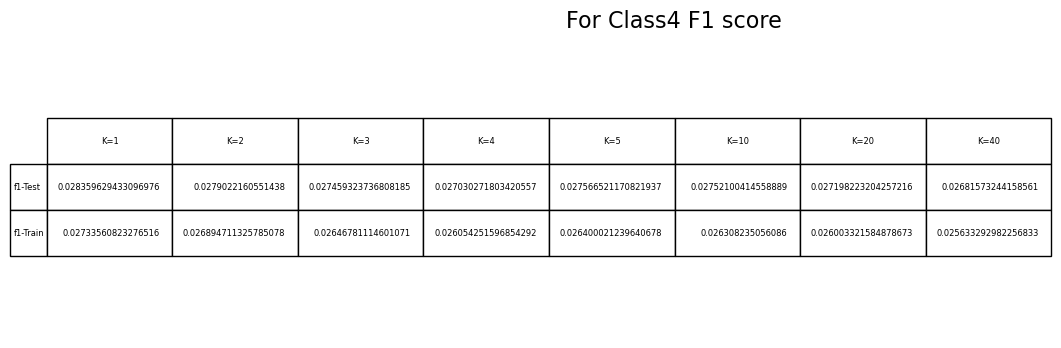

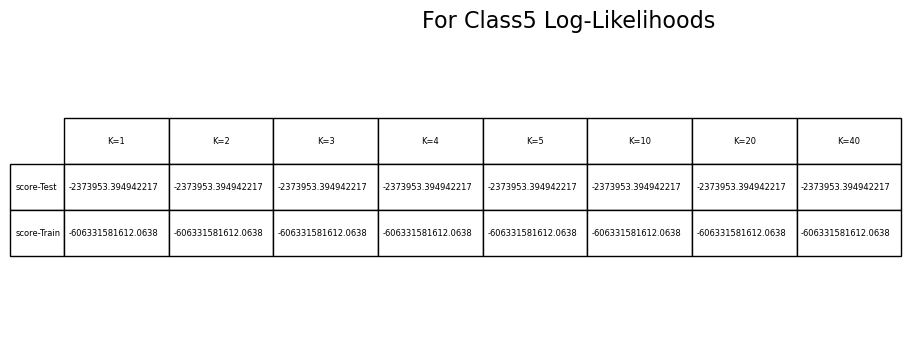

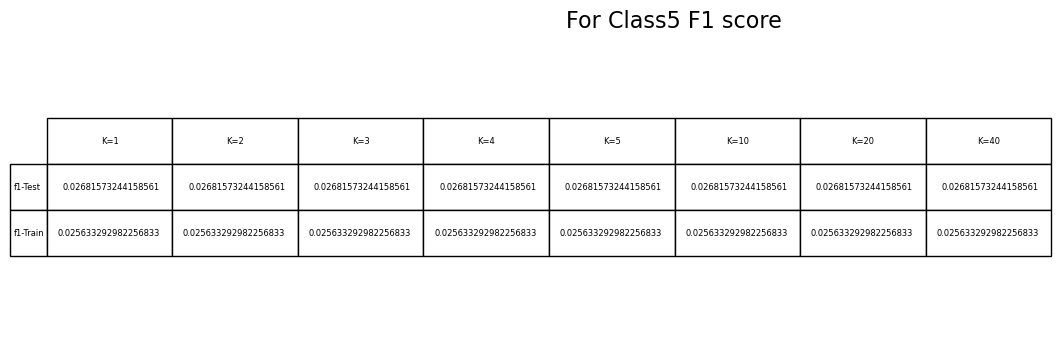

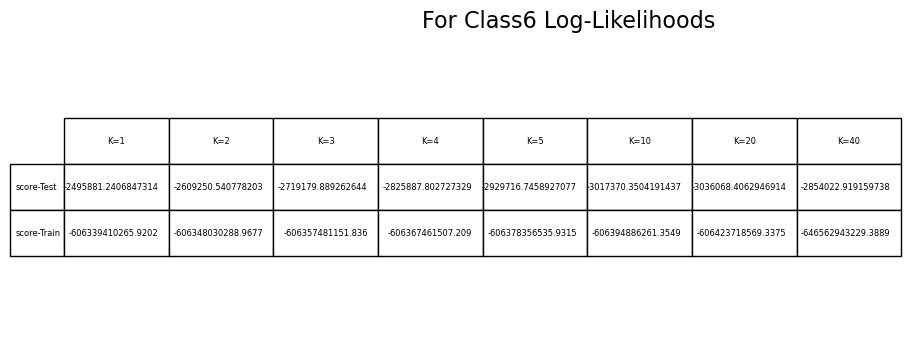

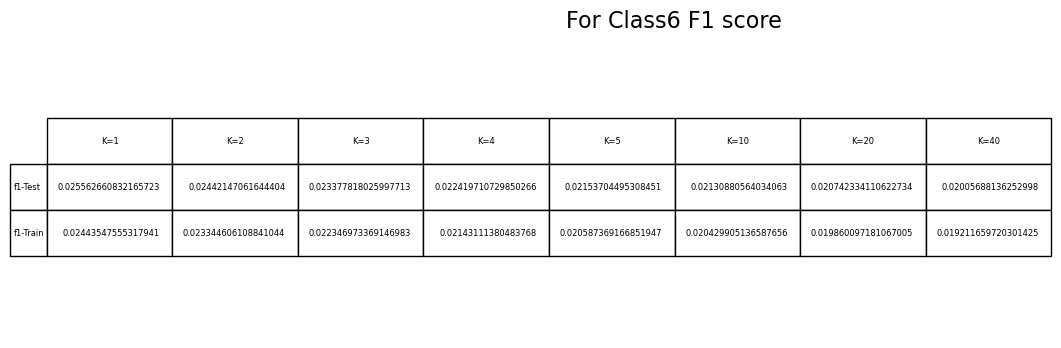

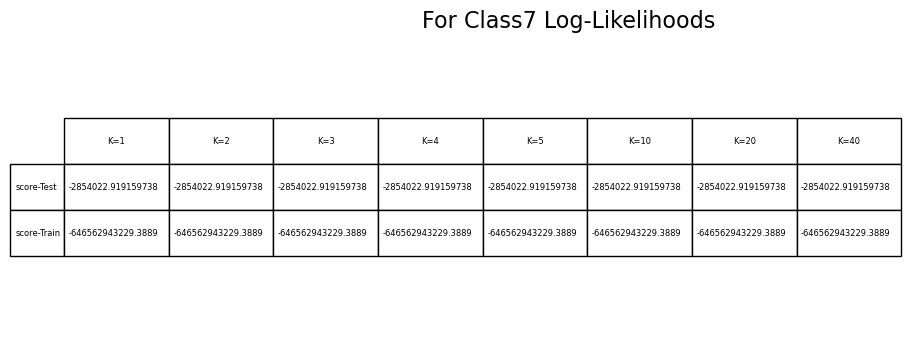

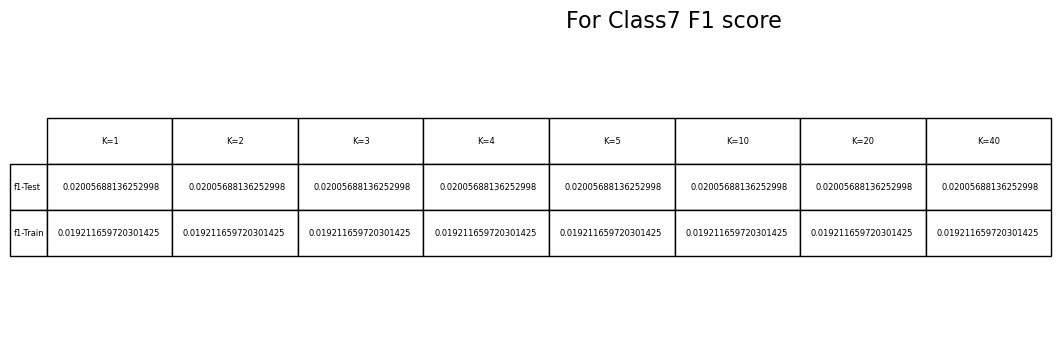

In [13]:
#LOG-LIKELIHOD AND F1-SCORE OF CLASSES
K_str=["K=1","K=2","K=3","K=4","K=5","K=10","K=20","K=40"]
interv=0
classes=["Class2","Class3","Class4","Class5","Class6","Class7"]
for cla, name in zip(range(2,8),classes):
    data_tuples = list(zip(K_str,score_final_train[interv:interv+8],score_final_test[interv:interv+8]))
    df_tup=pd.DataFrame(data_tuples, columns=['Class2','score_train',"score_test"])
    df=df_tup.pivot_table(values=["score_train","score_test"],  columns='Class2', aggfunc='first').reindex(K_str, axis=1)
    fig = plt.figure(dpi=100)
    ax1 = fig.add_subplot(1,1,1)


    table1=ax1.table(cellText = df.values,
              rowLabels = ["score-Test","score-Train"],
              colLabels = df.columns,
               loc = "center",
             colWidths=[.9]*8)
    table1.set_fontsize(6)
    table1.auto_set_font_size(False)
    table1.scale(0.25,2.75)
    ax1.axis('off')
    ax1.set_title("For "+name+" Log-Likelihoods",loc="right",fontsize=16)

    plt.show




    data_tuple1=data_tuples = list(zip(K_str,f1_final_train[interv:interv+8],f1_final_test[interv:interv+8]))
    df_tup1=pd.DataFrame(data_tuple1, columns=['Class2',"F1_train","F1_test"])
    df1=df_tup1.pivot_table(values=["F1_train","F1_test"],  columns='Class2', aggfunc='first').reindex(K_str, axis=1)

    fig = plt.figure(dpi=100)
    ax1 = fig.add_subplot(1,1,1)
    table1=ax1.table(cellText = df1.values,
              rowLabels = ["f1-Test","f1-Train"],
              colLabels = df1.columns,
               loc = "center",
             colWidths=[.9]*8)
    table1.set_fontsize(6)
    table1.auto_set_font_size(False)
    table1.scale(0.3,2.75)
    ax1.axis('off')
    ax1.set_title("For "+name+" F1 score",loc="right",fontsize=16)
    plt.show
    interv=interv+8

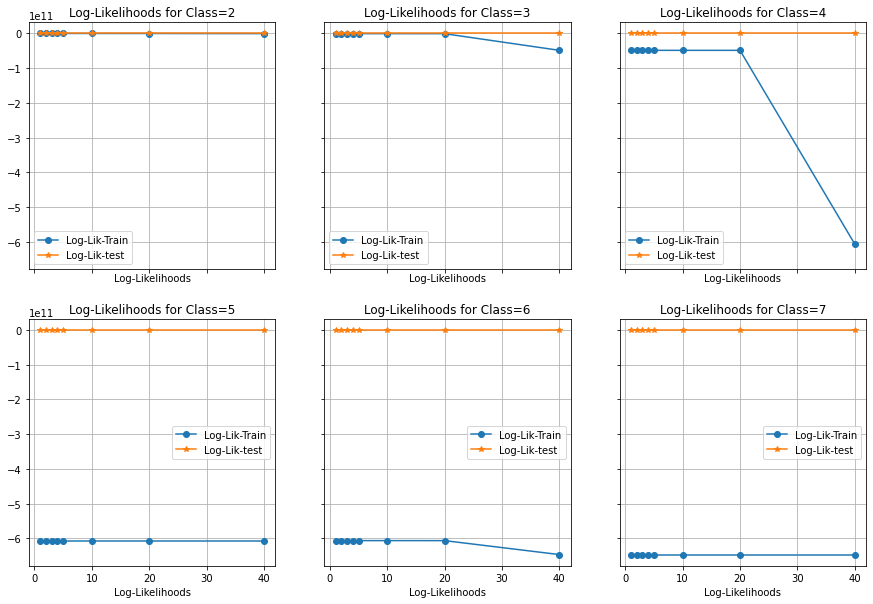

In [6]:
#PLOT FOR ALL CLASSES LOG-LIKELIHOODS
fig, axs = plt.subplots(2, 3, figsize=(15, 10),sharex=True, sharey=True)
axs=axs.ravel()
interval=0
pos=0
classes=["class2","class3","class4","class5","class6","class7"]
for cl in range(2,8):
    axs[pos].plot(K,score_final_train[interval:interval+8],label="Log-Lik-Train",marker="o")
    axs[pos].plot(K,score_final_test[interval:interval+8],label="Log-Lik-test",marker="*")
    axs[pos].set_title('Log-Likelihoods for Class={}'.format(cl)) 
    axs[pos].legend()
    axs[pos].set_xlabel("No of Mixture components")
    axs[pos].set_xlabel("Log-Likelihoods")
    axs[pos].grid()
    interval=interval+8
    pos=pos+1

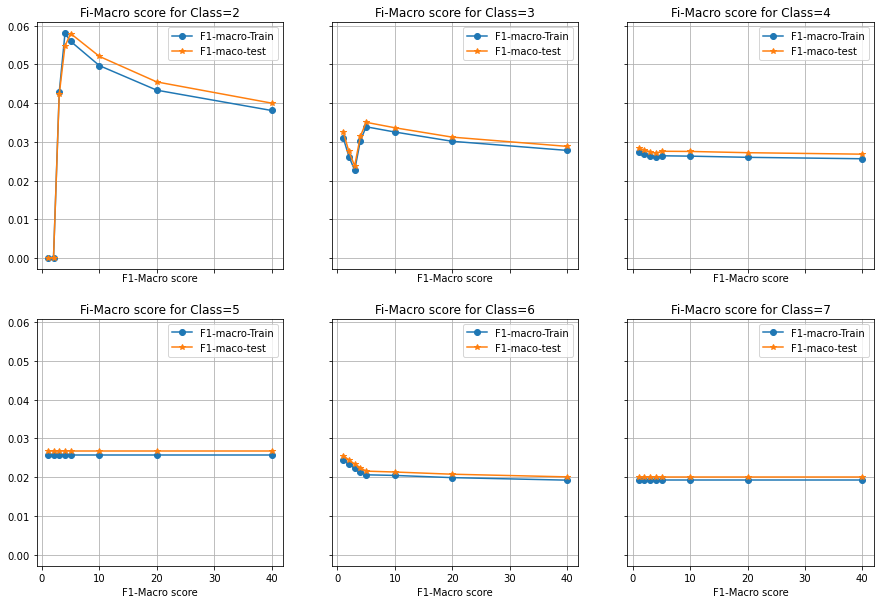

In [7]:
#PLOT FOR ALL CLASSES F1 SCORES
fig, axs = plt.subplots(2, 3, figsize=(15, 10),sharex=True, sharey=True)
axs=axs.ravel()
interval=0
pos=0
classes=["class2","class3","class4","class5","class6","class7"]
for cl in range(2,8):
    axs[pos].plot(K,f1_final_train[interval:interval+8],label="F1-macro-Train",marker="o")
    axs[pos].plot(K,f1_final_test[interval:interval+8],label="F1-maco-test",marker="*")
    axs[pos].set_title('Fi-Macro score for Class={}'.format(cl)) 
    axs[pos].legend()
    axs[pos].set_xlabel("No of Mixture components")
    axs[pos].set_xlabel("F1-Macro score")
    axs[pos].grid()
    interval=interval+8
    pos=pos+1

# CALCULATE LOG-LIKELIHOOD AND F1 SCORES IRRESPECTIVE OF THE CLASSES

In [46]:
#(1) Your code goes here
#CALCULATION OF LOG-LIKELIHOODS AND F1 SCORE WITH ALL DATA (IRRSPECTIVE OF THE CLASS SIZE)
K=[1,2,3,4,5,10,20,40]  #,2,3,5,10,20,40
Xn=X
Yn=Y[:,0]
score_train_temp=[]
score_test_temp=[]
f1_train_temp=[]
f1_test_temp=[]

score_train=[]
score_test=[]
f1train=[]
f1test=[]


for k,i in zip(K,range(0,8)):
    print("Current Cycle is k={}".format(k))
    gmm=GaussianMixture(covariance_type="diag",n_components=k)
    for a in range(1,30):
        train_id,test_id = train_idx[a][0].flatten(), test_idx[a][0].flatten()
        X_train, X_test, y_train, y_test = Xn[train_id], Xn[test_id], Yn[train_id], Yn[test_id]
        
        y_pred_train=gmm.fit_predict(X_train)
        y_pred_test=gmm.fit_predict(X_test)
        score_train_temp.append(gmm.score(X_train)*X_train.shape[0])
        score_test_temp.append(gmm.score(X_test)*X_test.shape[0])
        f1_train_temp.append(f1_score(y_train,y_pred_train,average="macro"))
        f1_test_temp.append(f1_score(y_test,y_pred_test,average="macro"))
        
    
    f1train.append(sum(f1_train_temp)/len(f1_train_temp))
    f1test.append(sum(f1_test_temp)/len(f1_test_temp))
    score_train.append(sum(score_train_temp)/len(score_train_temp))
    score_test.append(sum(score_test_temp)/len(score_test_temp))
    print("Value of k={} and log likelihood for train is {:.3f}, for test is {:,.3f} and F1 score for train is {:.5f} and F1 score for test is {:.5f}".format(k,score_train[i],score_test[i],f1train[i],f1test[i]))         

Current Cycle is k=1
Value of k=1 and log likelihood for train is -12717777.780, for test is -321,111.765 and F1 score for train is 0.00440 and F1 score for test is 0.00422
Current Cycle is k=2
Value of k=2 and log likelihood for train is -12834714.494, for test is -313,184.581 and F1 score for train is 0.00722 and F1 score for test is 0.01026
Current Cycle is k=3
Value of k=3 and log likelihood for train is -12869718.162, for test is -307,655.347 and F1 score for train is 0.01386 and F1 score for test is 0.01491
Current Cycle is k=4
Value of k=4 and log likelihood for train is -13034551.825, for test is -303,189.062 and F1 score for train is 0.02606 and F1 score for test is 0.02592
Current Cycle is k=5
Value of k=5 and log likelihood for train is -13224441.566, for test is -299,553.222 and F1 score for train is 0.03420 and F1 score for test is 0.03087
Current Cycle is k=10
Value of k=10 and log likelihood for train is -13763368.758, for test is -293,934.702 and F1 score for train is 0

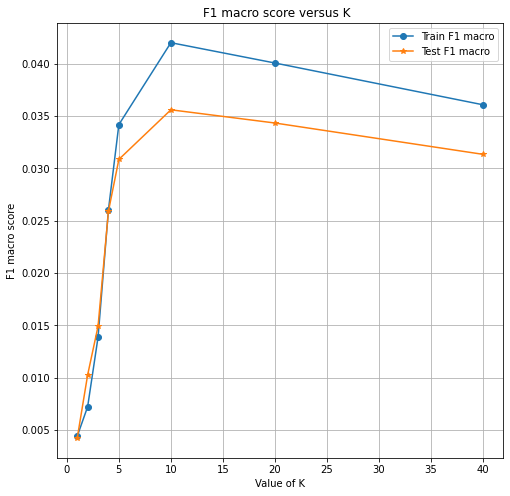

In [47]:
#PLOT F1 MACRO
plt.figure(figsize=(8,8))
x1 = K 
y1 = f1train
plt.plot(x1, y1, label = "Train F1 macro",marker="o")
x2 = K
y2 = f1test
plt.plot(x2, y2, label = "Test F1 macro",marker="*")
plt.xlabel('Value of K')
plt.ylabel('F1 macro score')
plt.title('F1 macro score versus K  ')
plt.legend()
plt.grid()
plt.show()

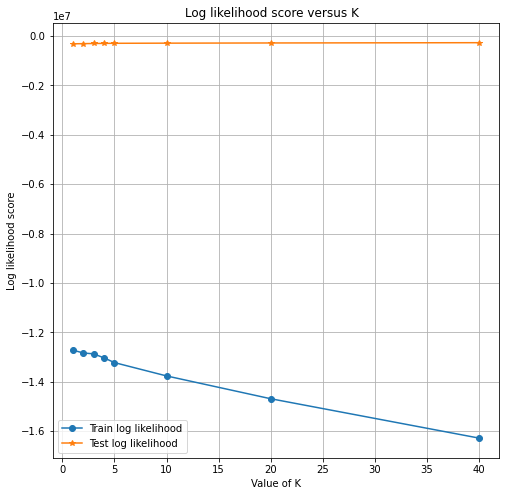

In [48]:
#PLOT LOG-LIKELIHOODS
plt.figure(figsize=(8,8))
x1 = K 
y1 = score_train
plt.plot(x1, y1, label = "Train log likelihood",marker="o")
x2 = K
y2 = score_test
plt.plot(x2, y2, label = "Test log likelihood",marker="*")
plt.xlabel('Value of K')
plt.ylabel('Log likelihood score')
plt.title('Log likelihood score versus K  ')
plt.legend()
plt.grid()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

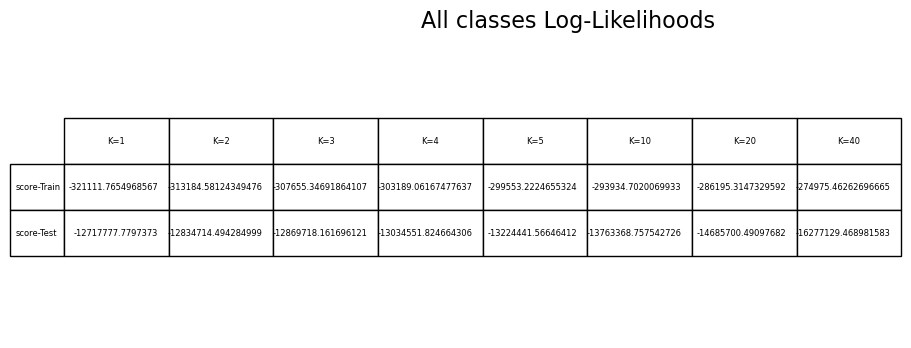

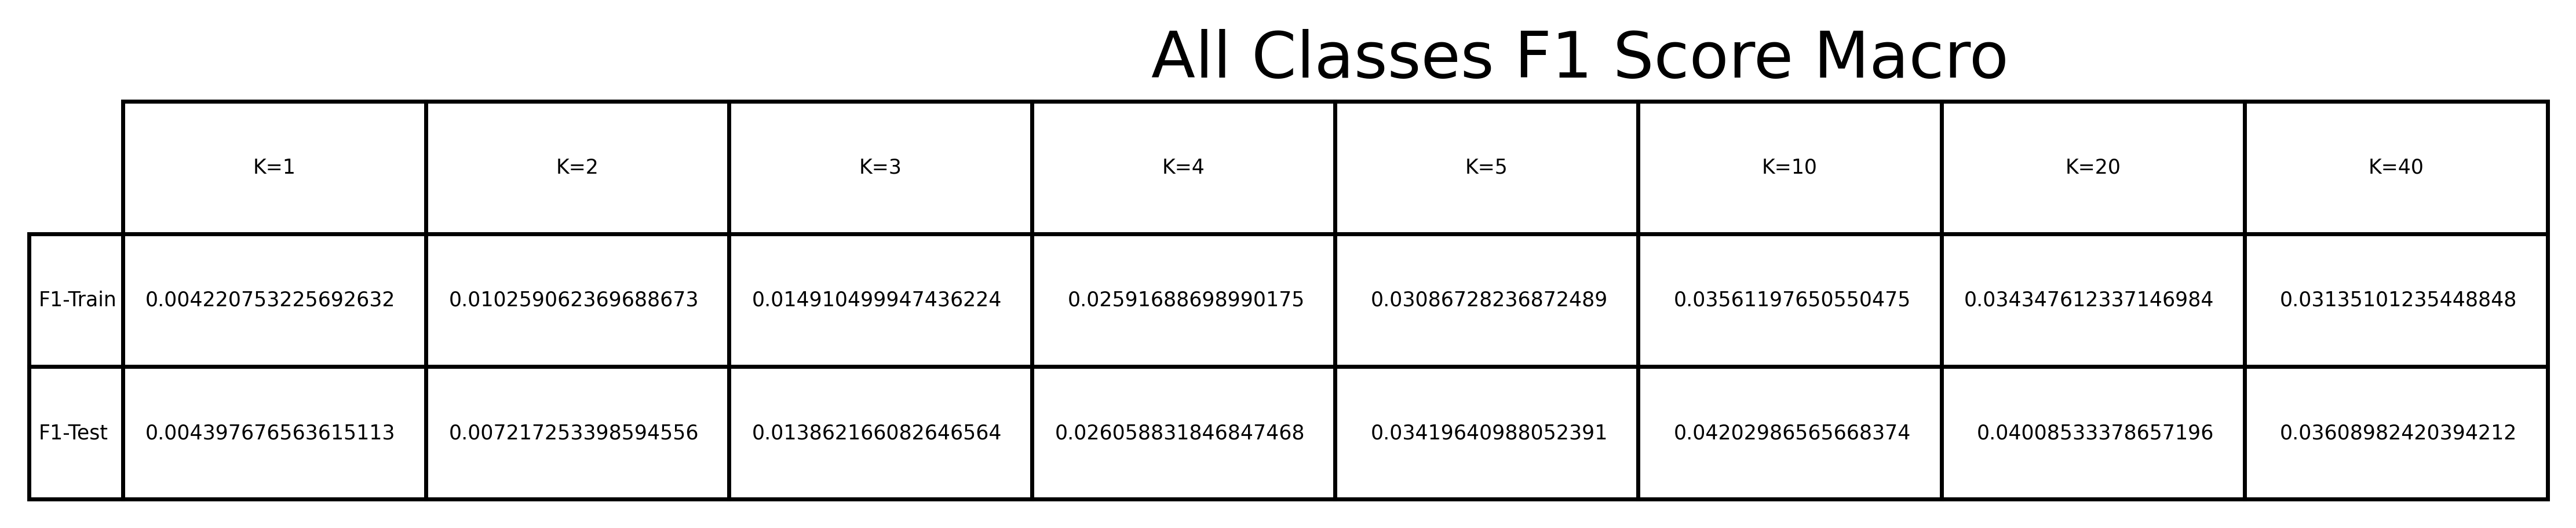

In [180]:
#All classes
K_str=["K=1","K=2","K=3","K=4","K=5","K=10","K=20","K=40"]
data_tuples = list(zip(K_str,score_train,score_test))
df_tup=pd.DataFrame(data_tuples, columns=['All Classes','score_train',"score_test"])
df=df_tup.pivot_table(values=["score_train","score_test"],  columns='All Classes', aggfunc='first').reindex(K_str, axis=1)
df

fig = plt.figure(dpi=100)
ax1 = fig.add_subplot(1,1,1)

table1=ax1.table(cellText = df.values,
          rowLabels = ["score-Train","score-Test"],
          colLabels = df.columns,
           loc = "center",
         colWidths=[.9]*8)
table1.set_fontsize(6)
table1.auto_set_font_size(False)
table1.scale(0.25,2.75)
ax1.axis('off')
ax1.set_title("All classes Log-Likelihoods",loc="right",fontsize=16)

plt.show





data_tuples = list(zip(K_str,f1train,f1test))
df_tup=pd.DataFrame(data_tuples, columns=['All Classes','f1train',"f1test"])

df=df_tup.pivot_table(values=["f1train","f1test"],  columns='All Classes', aggfunc='first').reindex(K_str, axis=1)
df


fig = plt.figure(dpi=500)
ax1 = fig.add_subplot(2,1,1)

table1=ax1.table(cellText = df.values,
          rowLabels = ["F1-Train","F1-Test"],
          colLabels = df.columns,
           loc = "center",
         colWidths=[.9]*8)
table1.set_fontsize(6) 
table1.scale(0.25,2.75)
ax1.axis('off')
ax1.set_title("All Classes F1 Score Macro",loc="right",fontsize=16)

plt.show

# USING SCORE_SAMPLES TO CALCULATE P(X|Ci)

In [6]:
def find(lst, a):
    return [i for i, x in enumerate(lst) if x==a]

Y_new=Y[:,0]
X_new=X
ff_train=[]
ff_test=[]
ss_train=[]
ss_test=[]


score_final_train=[]
score_final_test=[]
f1_final_train=[]
f1_final_test=[]
pos=0
def get_gmm_score(X, k):
    gmm = GaussianMixture(n_components=k,covariance_type="diag", max_iter=50)
    gmm.fit(X)
    gmm_scores = gmm.score_samples(X)
    score = np.exp(gmm_scores).sum()
    return score


K=[1,2,3,4,5,10,20,40]  #3,4,5,10,20,40

for cl in range(0,8):
    for k in K:
        for a in range(1,30):
            train_id,test_id = train_idx[a][0].flatten(), test_idx[a][0].flatten()
            X_train, X_test, y_train, y_test = X_new[train_id], X_new[test_id], Y_new[train_id], Y_new[test_id]  
            
            index_train=find(y_train,cl)
            X_tr=X_train[index_train]
            Y_tr=y_train[index_train]
            
            index_test=find(y_test,cl)
            X_te=X_test[index_test]
            
            
            if not X_te.any() or X_te.shape[0]<40:
                pass
            else:
                Y_te=y_test[index_test]
                ss_train.append(get_gmm_score(X_tr,k))
                ss_test.append(get_gmm_score(X_te,k))
            score_final_train.append(sum(ss_train))
            score_final_test.append(sum(ss_test))
            
        print(cl,k,score_final_train[pos])
        pos=pos+1
        




0 1 0
0 2 0
0 3 0
0 4 0
0 5 0
0 10 0
0 20 0
0 40 0
1 1 0
1 2 0
1 3 0
1 4 0
1 5 0
1 10 0
1 20 0
1 40 0
2 1 0
2 2 0
2 3 0
2 4 0
2 5 0
2 10 0
2 20 0
2 40 0
3 1 0
3 2 0
3 3 0
3 4 0
3 5 0
3 10 0
3 20 0
3 40 0
4 1 0
4 2 0
4 3 0
4 4 0
4 5 0
4 10 0
4 20 0
4 40 0
5 1 0
5 2 0
5 3 0
5 4 0
5 5 0
5 10 0
5 20 0
5 40 0
6 1 0
6 2 0
6 3 0
6 4 0
6 5 0
6 10 0
6 20 0
6 40 0
7 1 0
7 2 0
7 3 0
7 4 0
7 5 0
7 10 0
7 20 0
7 40 0


(2) ***Your answer goes here***

We took the entire dataset and applied GAussian mixture model on it with several different components. We separated each class from the dataset and applied the model on them separately. In doing so we found that class 1, class 8 and class 9 has not enough data to apply cross validation for all subjects. We had to skip them to complete our analysis. After calculating F1 score and log-likelihoods for each class we calculated them for the entire data set irrespective of the class size. 

1) For class 2 we can see both training and testing data are equally likely for all the number of components. The values of likelihoods for both training and testing are almost teh same.. For Class 3 the likelihood for the training data drops after k=20. For Class 4 the log-likelihood of training setdrops after 20 components. For class 6 and 7 the training set log likelihood is less then testing. For class 6 the testing set is three times more then training set. In shor the datsets are more likely if the value of k is 20 or less then that.

2) F1-score of the classes shows that the highest F1 score for Class 2 and Class 3 is achieved at k=5. For Class 4 and 6 the best F1-score is achieved at k=1 whereas for Class 5 and 7 the F1 score remains the same for all value sof K.

3) We trained the entire data set without class information and plotted the log-likelihood and F1-scores in separate graphs.For k=10 we get the highest F1-score for both traininga nd testing dataset. On the other hand the loglikelihood of training set gradually decreases whereas the loglikelihood of the testings et remains the same.

\pagebreak

In [2]:
# This cell's output will confirm all cells have been run if you select Kernel->Restart & Run All.
# Wait until you see the output printed
print("*****************************")
print("*                           *")
print("* All cells have been run!! *")
print("*                           *")
print("*****************************")

*****************************
*                           *
* All cells have been run!! *
*                           *
*****************************
